### IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import time

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR


In [2]:
random_state = min(332078, 332464)

### DATASETS

In [42]:
df_dev = pd.read_csv('development.csv')
df_eval = pd.read_csv('evaluation.csv',index_col='Id')

In [4]:
df_dev

x      y    pmax[0]  negpmax[0]    area[0]     tmax[0]    rms[0]  \
0       200.0  200.0   4.066907  -17.690173   2.847932    0.600000  2.007042   
1       200.0  200.0   5.916801   -4.717111   5.792778   79.765174  1.564535   
2       200.0  200.0   4.286652   -5.316132   2.356390   74.600000  1.404622   
3       200.0  200.0   4.003635   -4.617459   2.189005   43.000000  1.512162   
4       200.0  200.0   4.448146   -4.848743   3.997002  196.667482  1.101113   
...       ...    ...        ...         ...        ...         ...       ...   
385495  600.0  595.0   5.051422   -3.872162  14.537390   32.000000  1.103550   
385496  600.0  595.0   4.067664   -5.534358   2.011714   40.200000  1.895393   
385497  600.0  595.0   4.243555   -5.801462   3.199481  150.891763  1.248541   
385498  600.0  595.0  14.552444   -5.017258   6.367075   72.200000  1.215713   
385499  600.0  595.0   4.203323  -21.787461   3.241678   65.200000  1.780837   

          pmax[1]  negpmax[1]    area[1]  ...    pmax[16]  negpmax[16]  \
0        5.409161  -17.721210   4.538778  ...  607.109118   -36.282996   
1        4.414289   -4.736827   3.720435  ...  630.348007   -39.715988   
2        4.567191   -5.985437   3.490490  ...  613.880342   -40.679678   
3        5.019058   -4.229949   6.786200  ...  600.714957   -43.206601   
4        3.250262   -5.783587   2.449456  ...  609.723785   -43.570892   
...           ...         ...        ...  ...         ...          ...   
385495  49.819376  -26.266623  24.781403  ...  581.954264   -39.634247   
385496  51.016495  -26.138474  27.090894  ...  591.334030   -40.229095   
385497  46.661682  -30.943115  24.980347  ...  619.698505   -46.600293   
385498  46.515765  -22.520367  33.163073  ...  597.935632   -43.848615   
385499  53.988147  -26.616895  31.294717  ...  605.837434   -43.600342   

          area[16]   tmax[16]   rms[16]    pmax[17]  negpmax[17]    area[17]  \
0       583.899899  72.373094  0.374498  614.916861   -39.848523  591.852768   
1       580.042799  71.029155  0.403258  624.950701   -41.266681  586.569646   
2       580.407491  71.892264  0.568777  596.437125   -42.712286  574.091695   
3       579.882635  72.357388  0.255483  591.763739   -50.681940  584.099483   
4       590.156125  71.249130  0.413855  606.917023   -49.923819  584.316142   
...            ...        ...       ...         ...          ...         ...   
385495  580.419676  71.167754  0.714250  614.629732   -47.182980  594.565758   
385496  589.105579  71.562414  0.325978  589.602095   -49.995053  588.799525   
385497  582.079851  71.420761  0.430833  610.999390   -43.620535  589.163170   
385498  589.201047  71.426835  0.474301  611.263138   -49.387009  587.916994   
385499  583.723657  71.814597  0.509508  581.580222   -51.947507  582.576141   

         tmax[17]   rms[17]  
0       72.331028  0.405595  
1       71.089058  0.405890  
2       71.943934  0.498019  
3       72.333282  0.336454  
4       71.242904  0.293824  
...           ...       ...  
385495  71.359798  0.345872  
385496  71.539605  0.318873  
385497  71.569655  0.301635  
385498  71.466307  0.408242  
385499  72.015844  0.354110  

[385500 rows x 92 columns]

In [5]:
# COLUMNS
df_dev.columns

Index(['x', 'y', 'pmax[0]', 'negpmax[0]', 'area[0]', 'tmax[0]', 'rms[0]',
       'pmax[1]', 'negpmax[1]', 'area[1]', 'tmax[1]', 'rms[1]', 'pmax[2]',
       'negpmax[2]', 'area[2]', 'tmax[2]', 'rms[2]', 'pmax[3]', 'negpmax[3]',
       'area[3]', 'tmax[3]', 'rms[3]', 'pmax[4]', 'negpmax[4]', 'area[4]',
       'tmax[4]', 'rms[4]', 'pmax[5]', 'negpmax[5]', 'area[5]', 'tmax[5]',
       'rms[5]', 'pmax[6]', 'negpmax[6]', 'area[6]', 'tmax[6]', 'rms[6]',
       'pmax[7]', 'negpmax[7]', 'area[7]', 'tmax[7]', 'rms[7]', 'pmax[8]',
       'negpmax[8]', 'area[8]', 'tmax[8]', 'rms[8]', 'pmax[9]', 'negpmax[9]',
       'area[9]', 'tmax[9]', 'rms[9]', 'pmax[10]', 'negpmax[10]', 'area[10]',
       'tmax[10]', 'rms[10]', 'pmax[11]', 'negpmax[11]', 'area[11]',
       'tmax[11]', 'rms[11]', 'pmax[12]', 'negpmax[12]', 'area[12]',
       'tmax[12]', 'rms[12]', 'pmax[13]', 'negpmax[13]', 'area[13]',
       'tmax[13]', 'rms[13]', 'pmax[14]', 'negpmax[14]', 'area[14]',
       'tmax[14]', 'rms[14]', 'pmax[15]', 

1) pmax[0], pmax[1], ... pmax[17]: the magnitude of the positive peak of the signal, in mV
2) negpmax[0], negpmax[1], ... negpmax[17]: the magnitude of the negative peak of the signal, in mV
3) tmax[0], tmax[1], ... tmax[17]: the delay (in ns) from a reference time when the positive peak of the signal
4) area[0], area[1], ... area[17]: the area under the signal
5) rms[0], rms[1], ... rms[17]: the root mean square (RMS) value of the signal

In [6]:
# NAN VALUES
display(df_dev.isna().any())
print(f'\nThe dataset has {df_dev.isna().any().sum()} NaN values')

x              False
y              False
pmax[0]        False
negpmax[0]     False
area[0]        False
               ...  
pmax[17]       False
negpmax[17]    False
area[17]       False
tmax[17]       False
rms[17]        False
Length: 92, dtype: bool


The dataset has 0 NaN values


In [7]:
# DESCRIBE
df_dev.describe()

x              y        pmax[0]     negpmax[0]  \
count  385500.000000  385500.000000  385500.000000  385500.000000   
mean      397.723735     404.106355       4.866423      -5.046162   
std       120.593104     113.652228       1.481220      15.877804   
min       200.000000     200.000000       1.394440   -7741.109923   
25%       285.000000     310.000000       4.123941      -5.257178   
50%       400.000000     405.000000       4.668321      -4.646420   
75%       500.000000     500.000000       5.265888      -4.093211   
max       600.000000     600.000000      20.515415      -0.745816   

             area[0]        tmax[0]         rms[0]        pmax[1]  \
count  385500.000000  385500.000000  385500.000000  385500.000000   
mean        4.330495      97.593811       1.340462      16.510543   
std         3.489414      59.444364       0.342167      16.781018   
min        -0.582573       0.000000       0.275854       2.028134   
25%         2.383830      46.400000       1.096611       5.619728   
50%         3.361071      90.600000       1.316209      10.068513   
75%         5.104368     151.026985       1.557156      19.031319   
max       149.589043     204.600000       6.088277     106.649066   

          negpmax[1]        area[1]  ...       pmax[16]    negpmax[16]  \
count  385500.000000  385500.000000  ...  385500.000000  385500.000000   
mean       -9.187917      10.504198  ...     608.650804     -42.152047   
std        29.955290       8.444105  ...      13.723698       3.158175   
min     -9930.114637      -0.997301  ...     451.502789     -51.840704   
25%        -8.114323       4.755876  ...     598.888989     -44.601152   
50%        -5.229009       7.886552  ...     607.190645     -42.360754   
75%        -4.387686      12.945553  ...     616.837596     -39.833169   
max        -1.054508     152.517700  ...     665.267443     -29.085419   

            area[16]       tmax[16]        rms[16]       pmax[17]  \
count  385500.000000  385500.000000  385500.000000  385500.000000   
mean      583.569358      71.628631       0.452944     609.060121   
std         6.646175       0.577619       0.299456      13.928735   
min       516.386725      70.420683       0.129428     456.816620   
25%       579.190080      71.144733       0.342264     599.390156   
50%       583.512671      71.627565       0.400117     607.202368   
75%       587.982952      72.134776       0.466077     617.313303   
max       614.884980      72.856918       5.031400     675.052221   

         negpmax[17]       area[17]       tmax[17]        rms[17]  
count  385500.000000  385500.000000  385500.000000  385500.000000  
mean      -46.921923     583.060292      71.695363       0.371027  
std         3.478838       6.992203       0.585629       0.081983  
min       -57.876959     513.760083      70.423425       0.102138  
25%       -49.596344     578.269642      71.200245       0.321753  
50%       -47.147636     583.401620      71.681603       0.366981  
75%       -44.375652     587.877953      72.194196       0.415578  
max       -29.592059     619.099952      73.031394       4.925181  

[8 rows x 92 columns]

# PREPROCESSING

### DATA VISUALIZATION

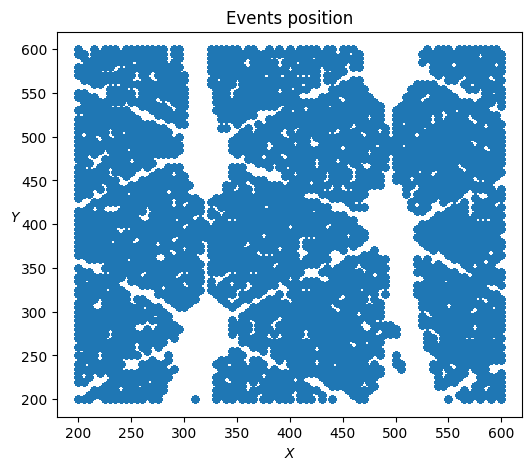

In [8]:
# DATA VISUALIZATION
df_dev.plot.scatter('x','y',figsize=(6,5))
plt.xlabel('$X$')
plt.ylabel('$Y$',rotation=0)
plt.title('Events position')
plt.show()

Some areas of the sensor are not covered by any event. That occurs because, at those coordinates, either pads or wires used to read the signals from the pads (due to their reflective properties) are presen

In [9]:
def moving_average_series(input_series, window_size=10000):
    weights = [1.0 / window_size] * window_size
    smoothed_data = input_series.rolling(window=window_size, center=True).mean()
    return smoothed_data

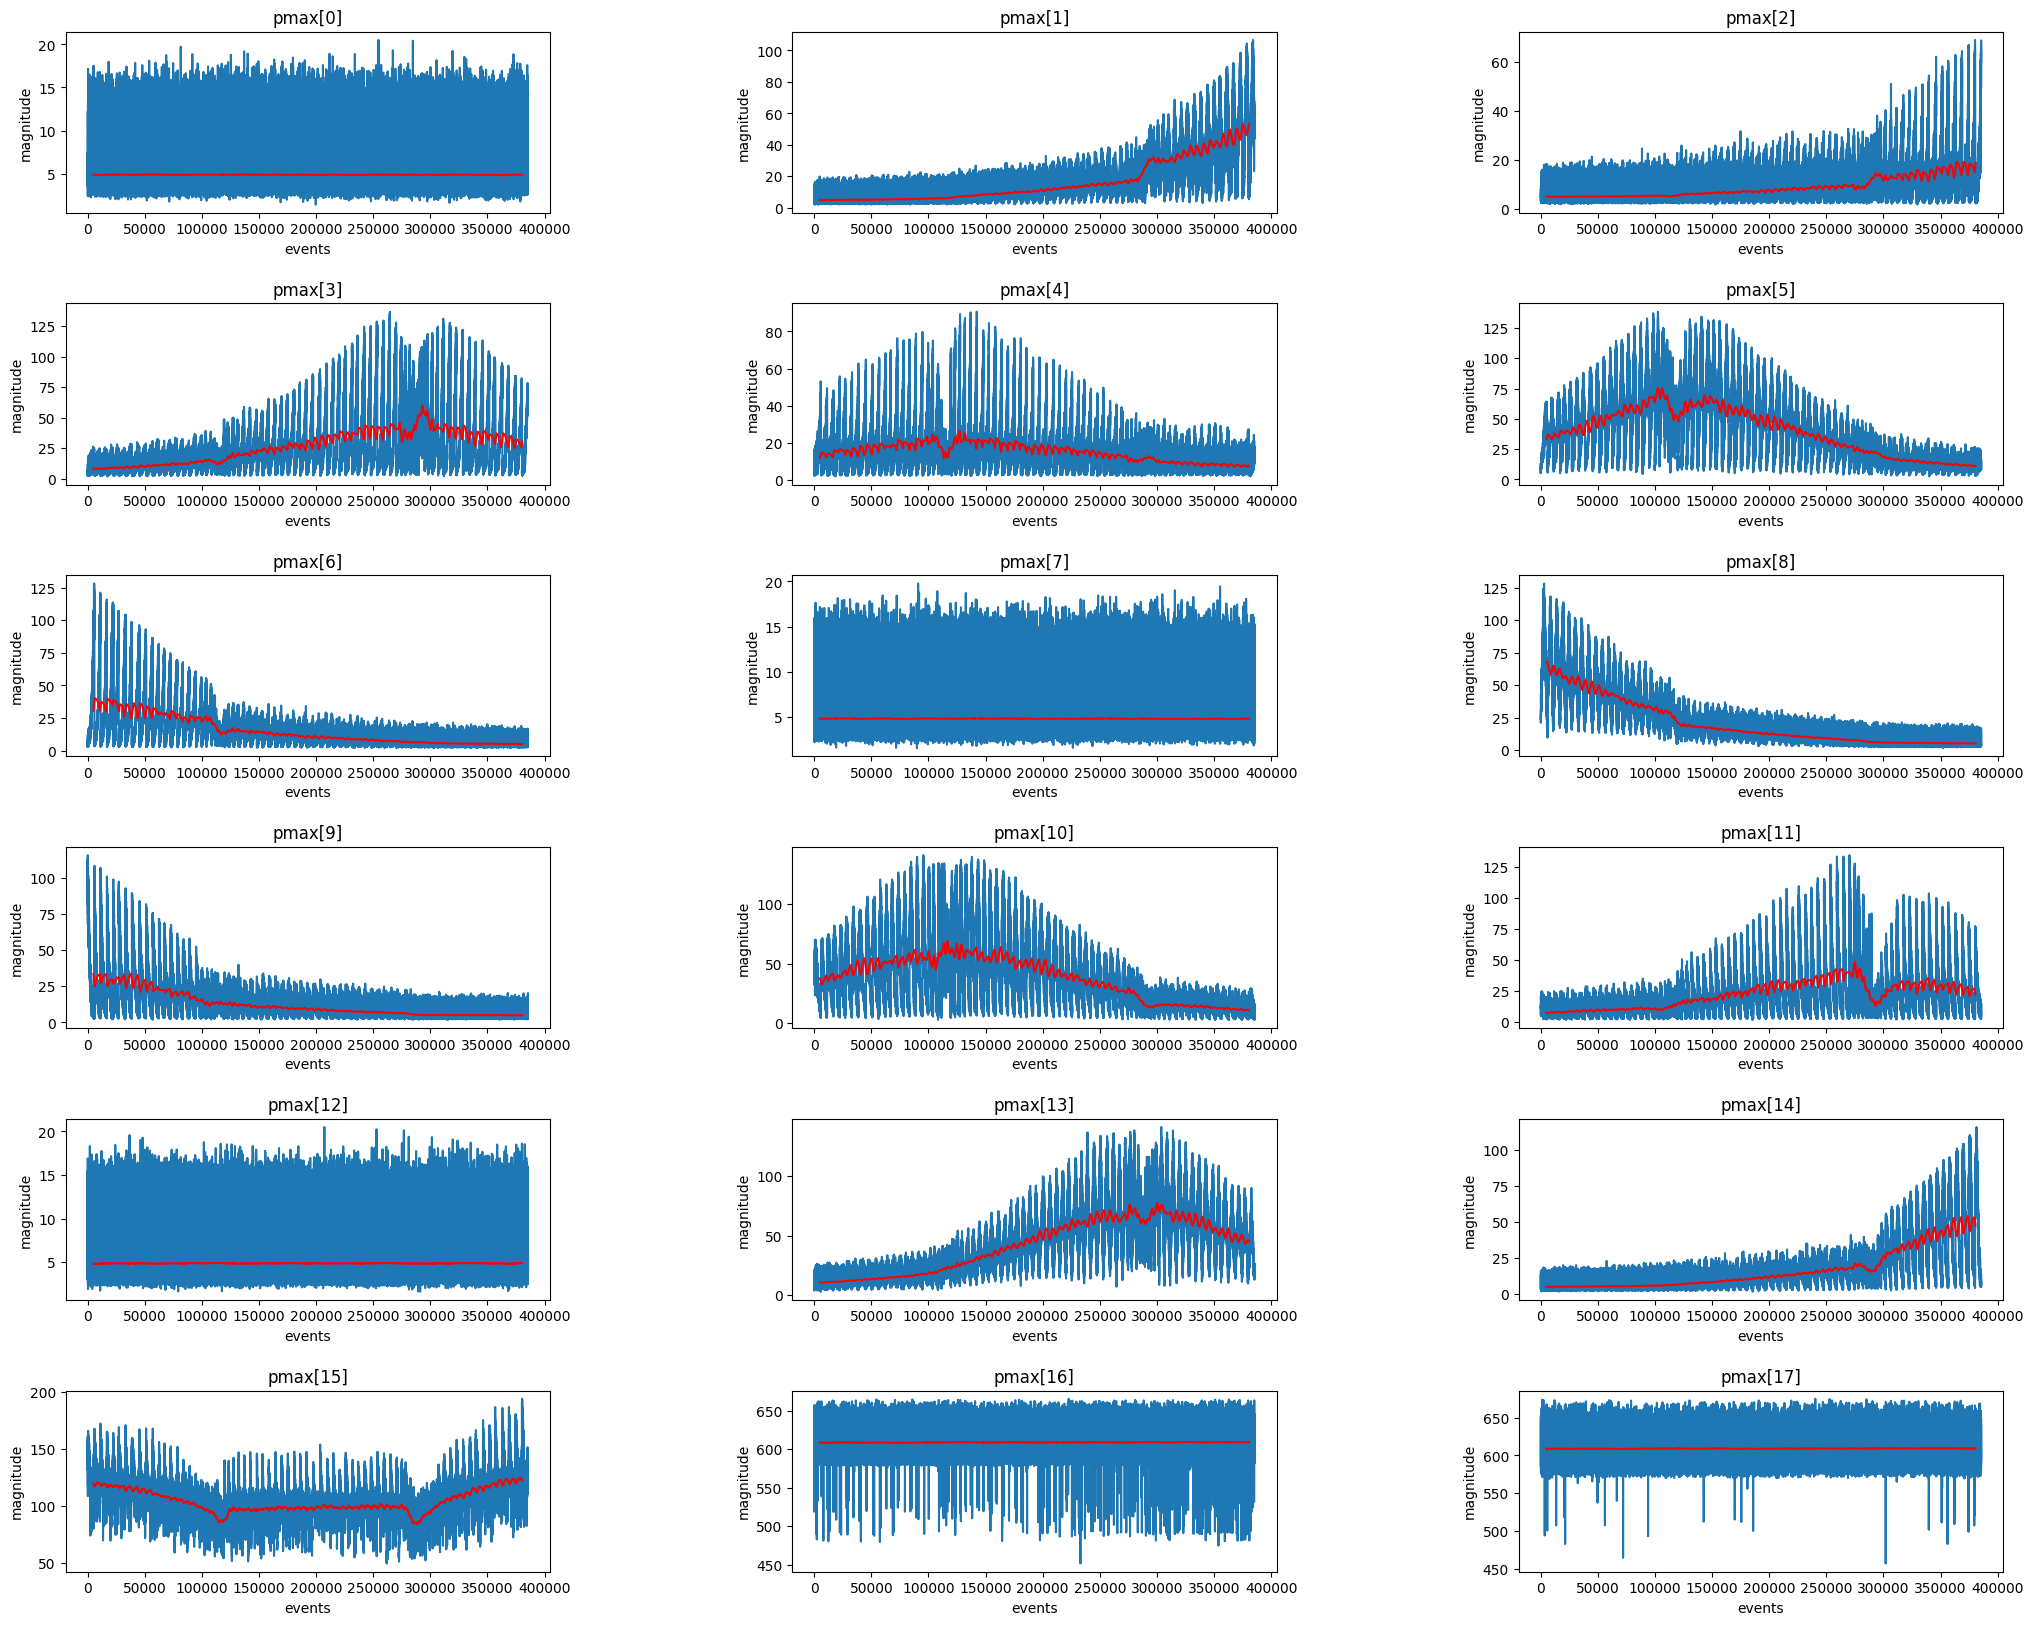

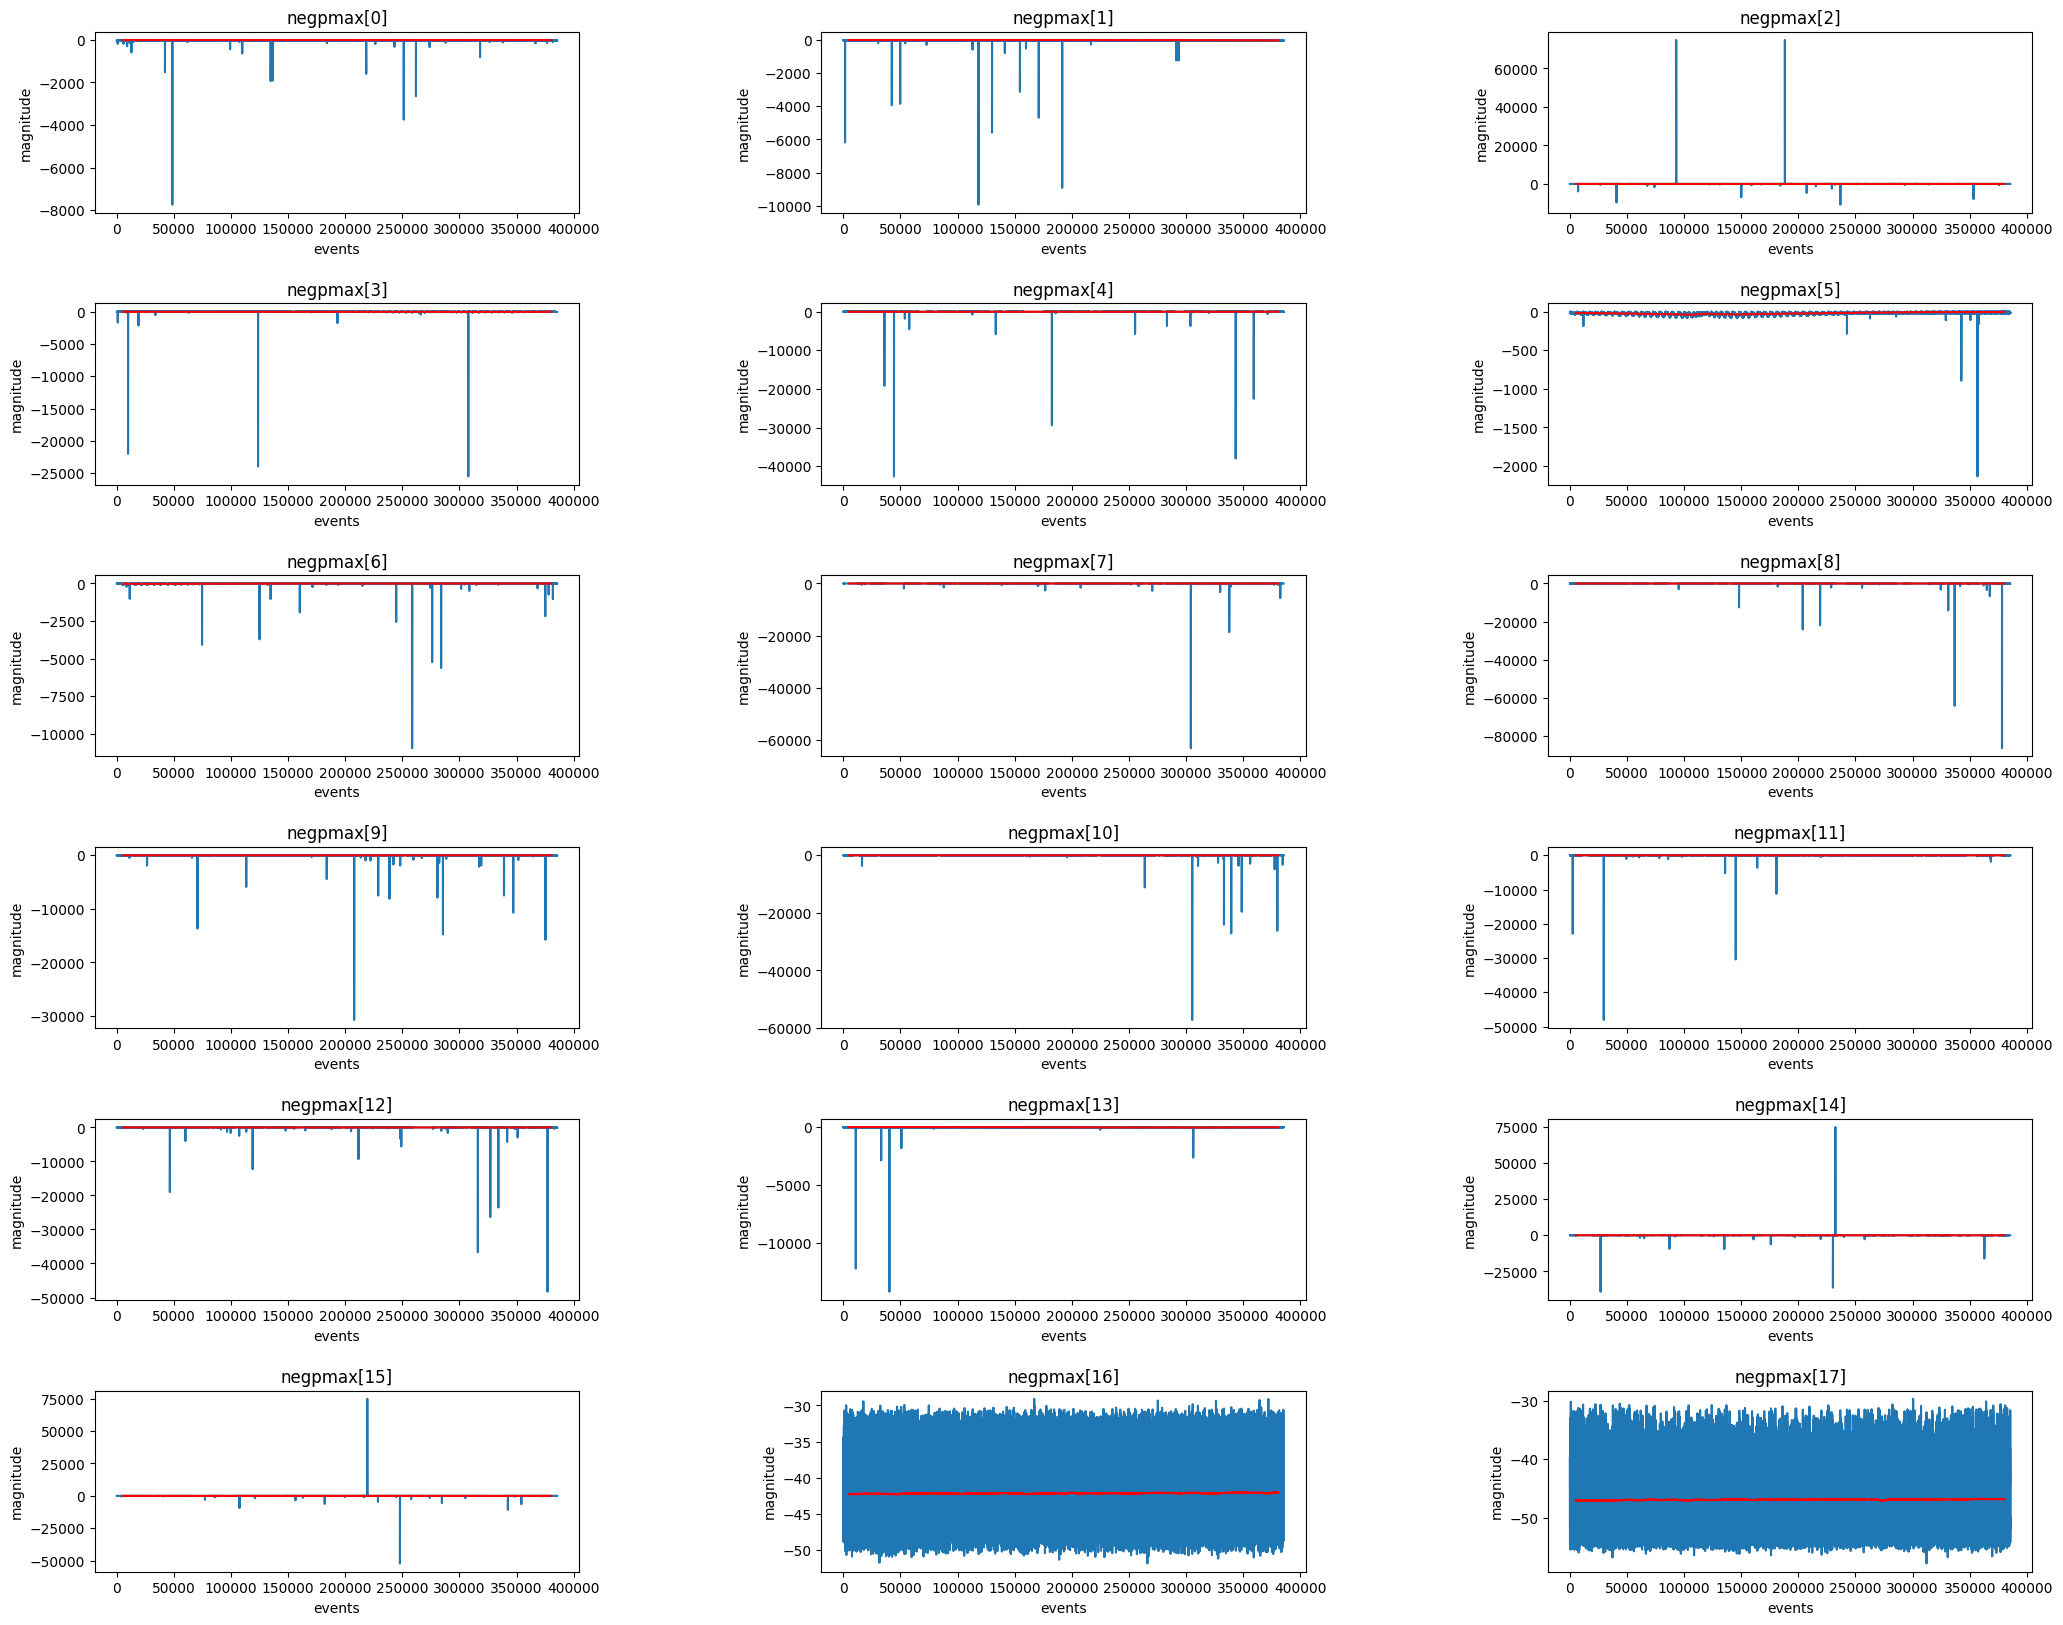

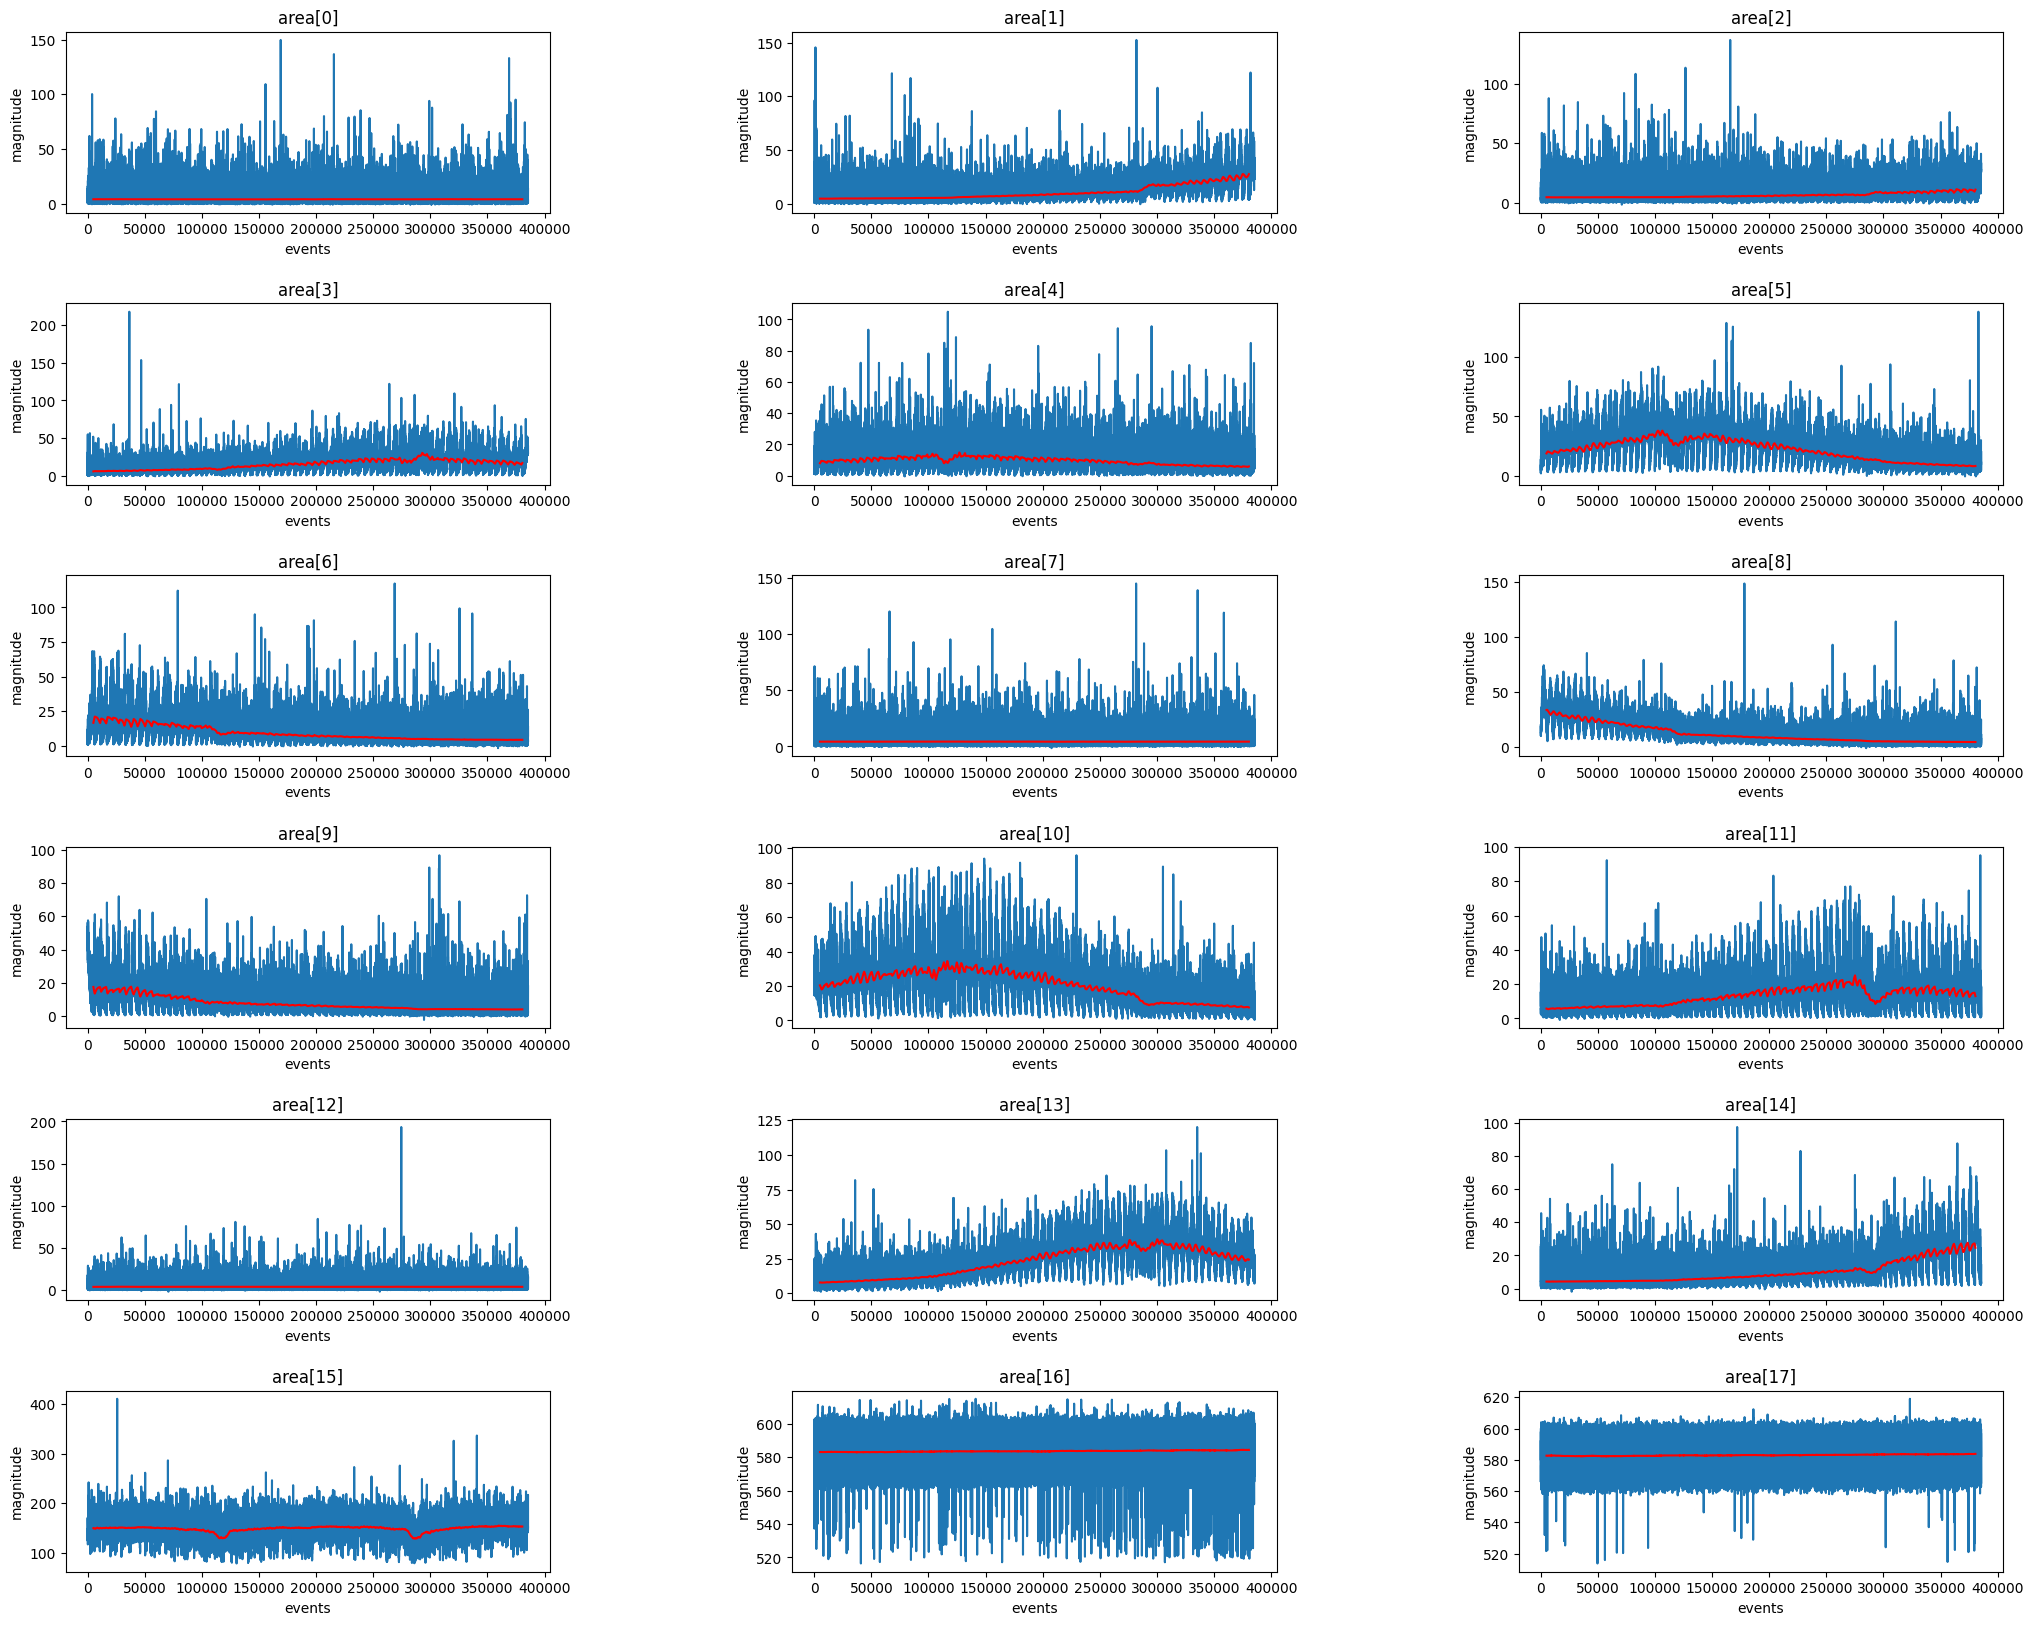

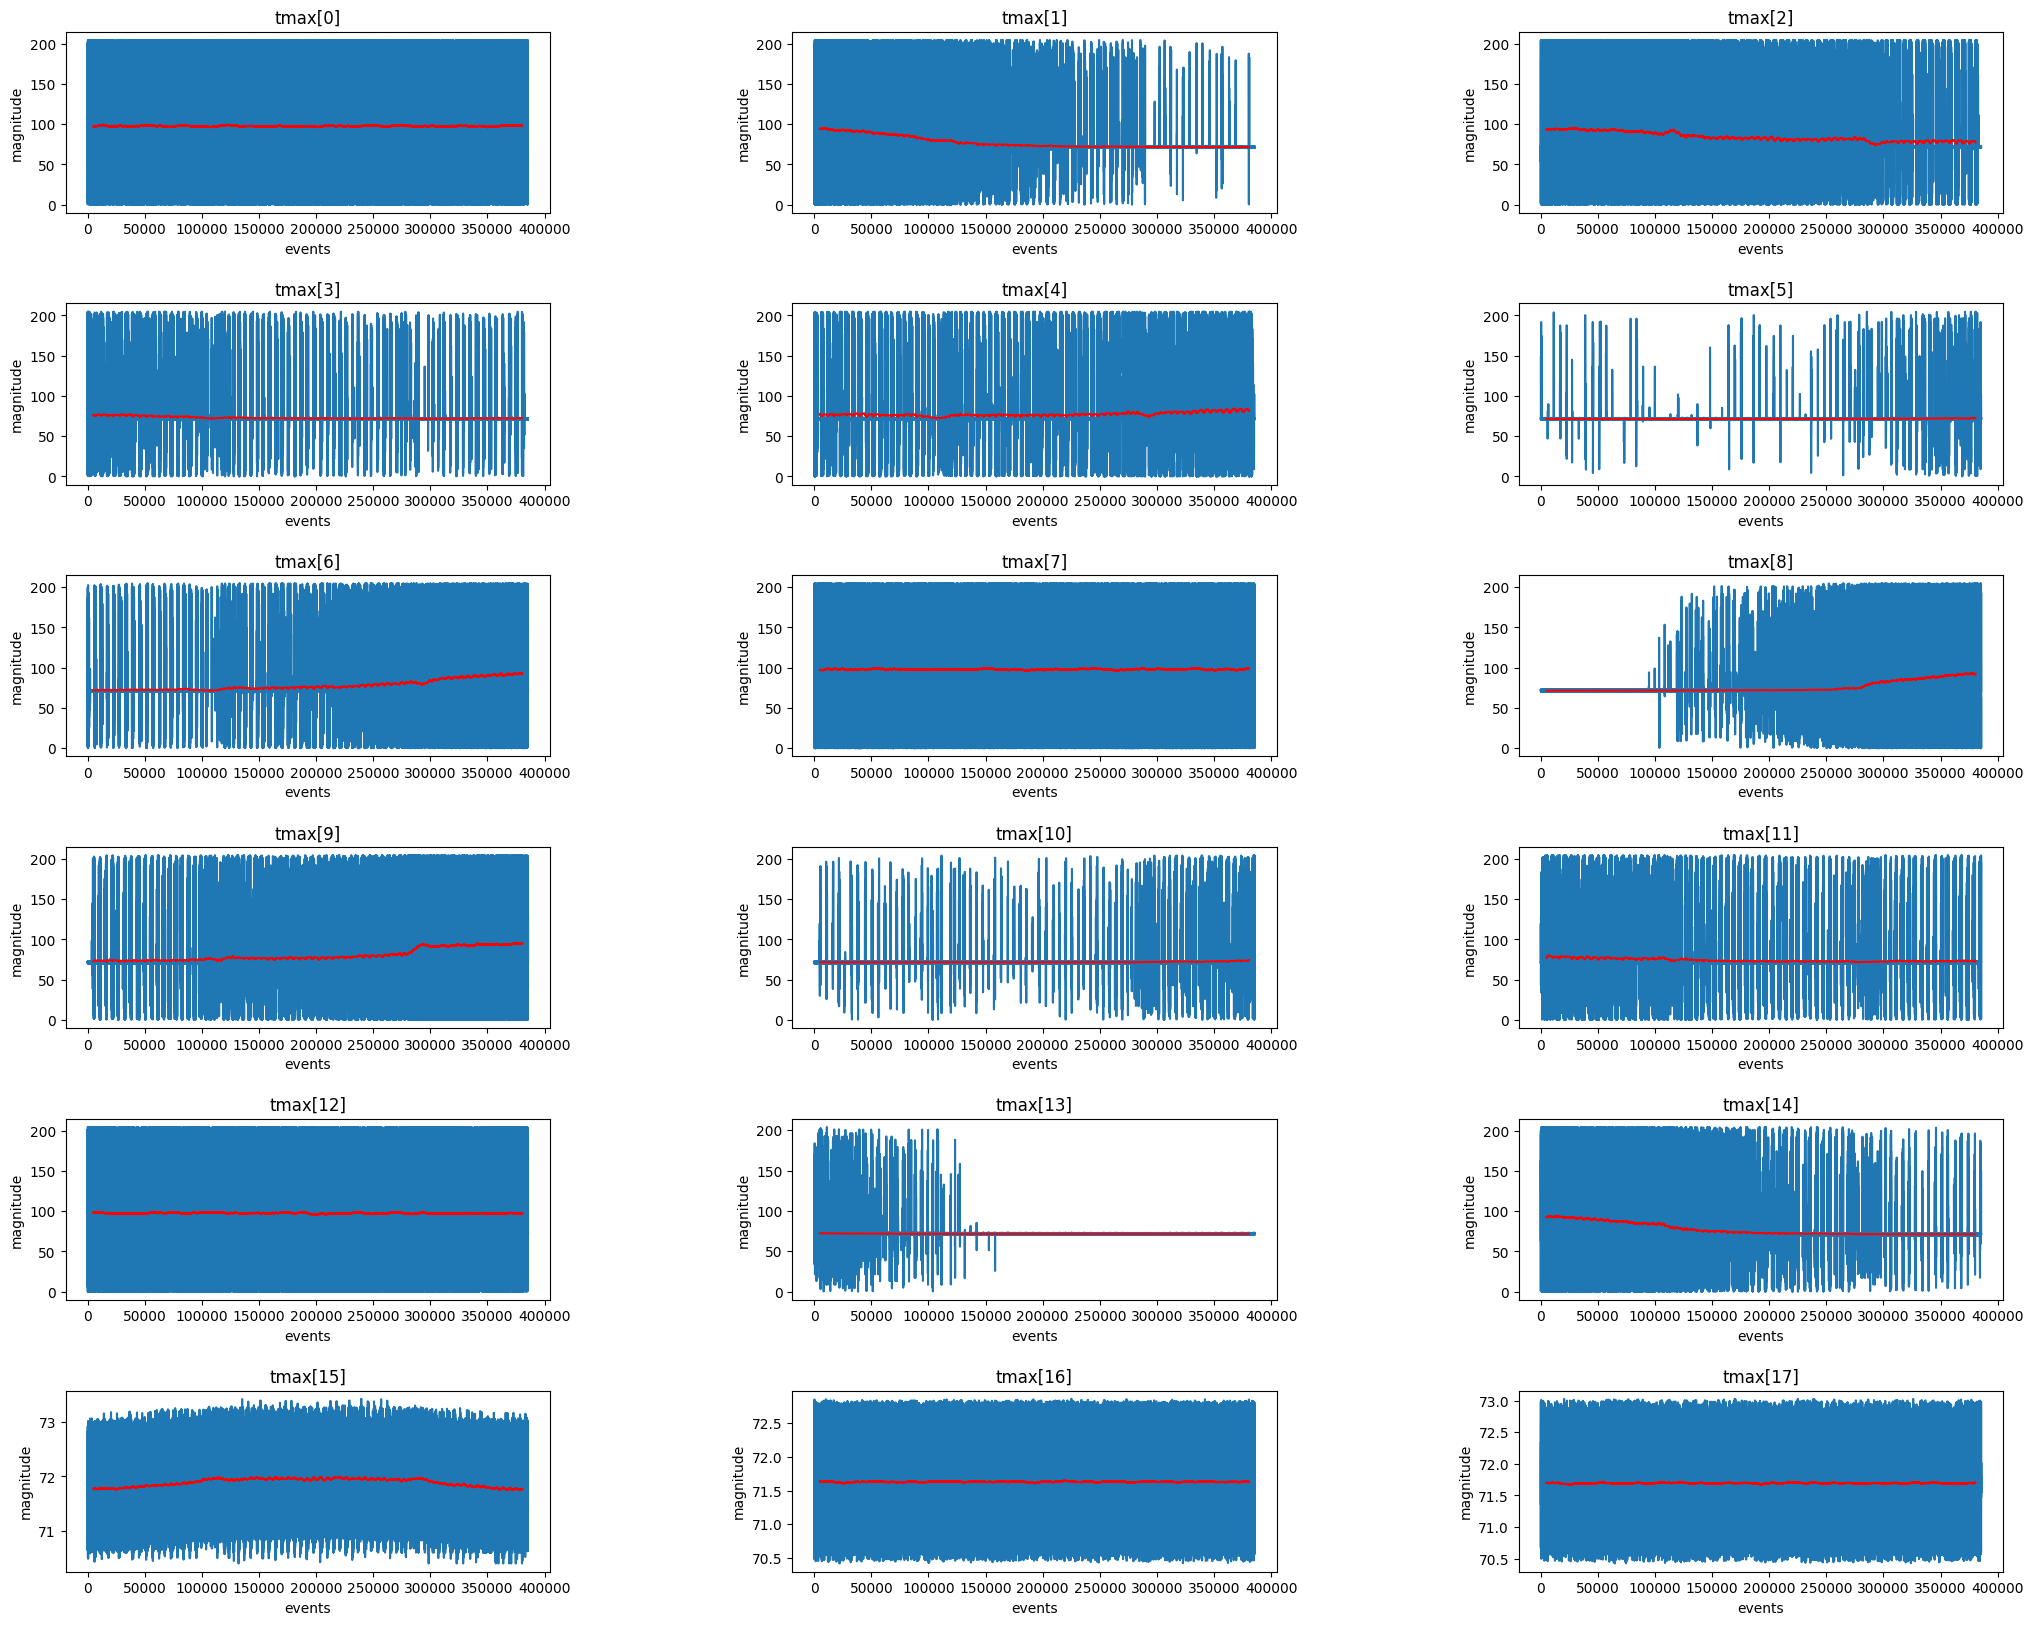

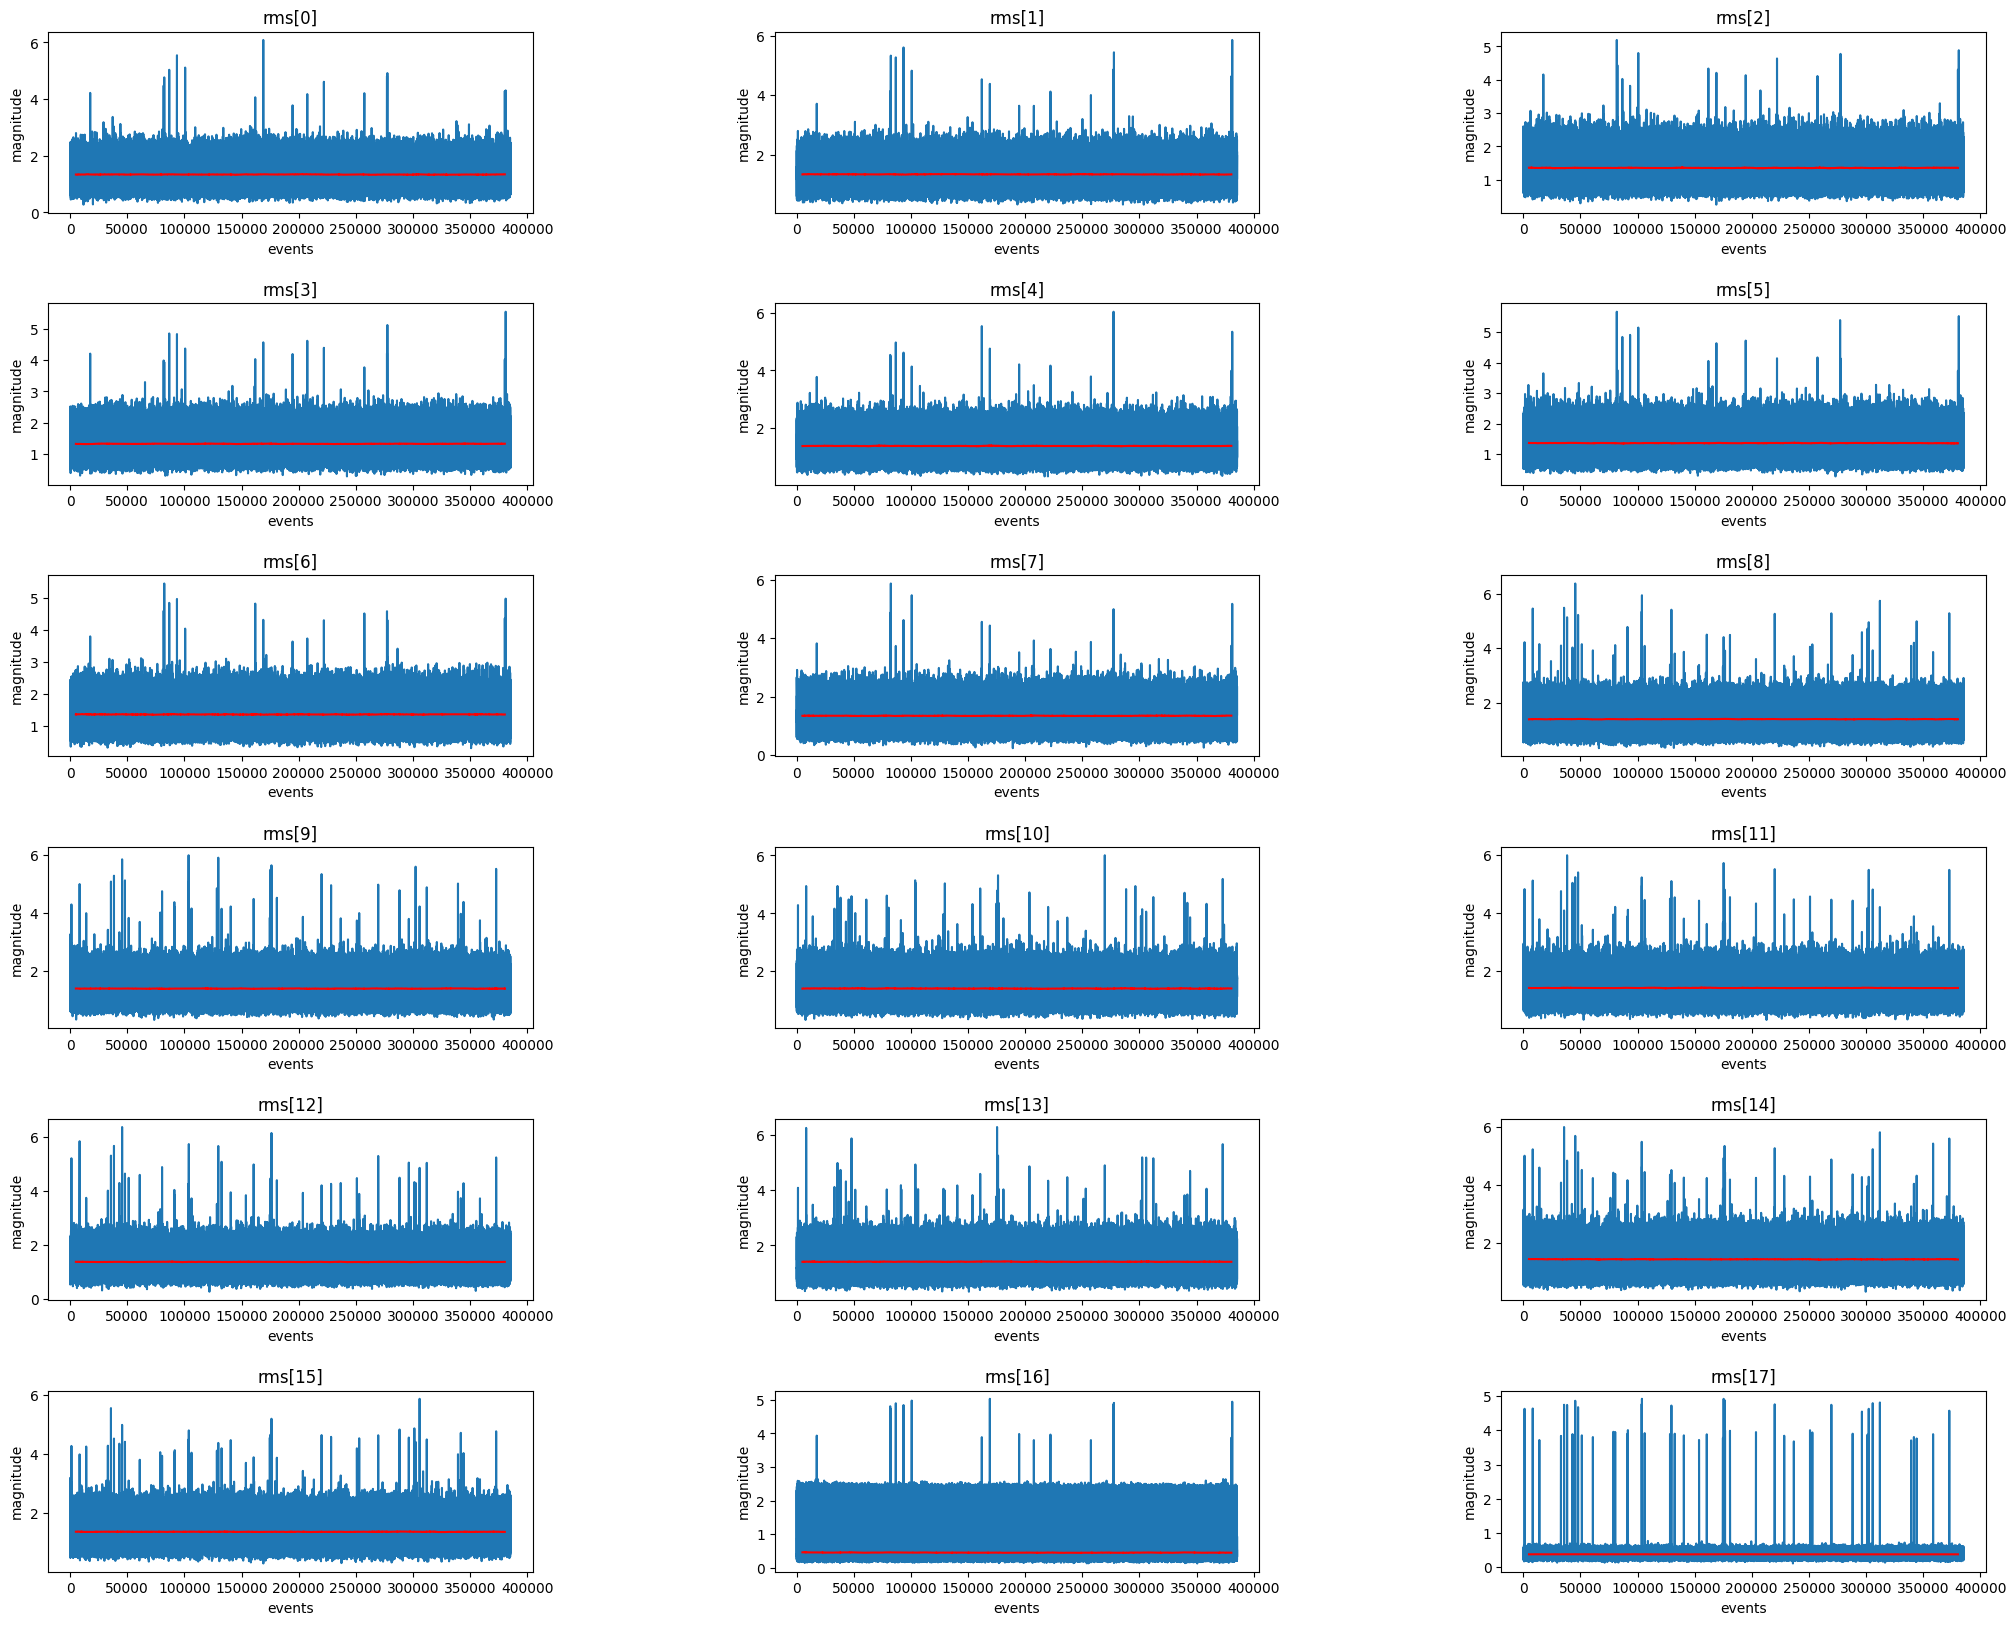

In [10]:
# GRAPHS OF THE FEATURES
for elem in ['pmax','negpmax','area','tmax','rms']:
    rows, cols = 6, 3
    fig, ax = plt.subplots(rows, cols, figsize=(25, 20))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    i=0
    for row in range(rows):
        for col in range(cols):
            ax[row, col].plot(df_dev[f'{elem}[{i}]'])
            ax[row, col].plot(moving_average_series(df_dev[f'{elem}[{i}]']), c='red')
            ax[row,col].set_title(f'{elem}[{i}]')
            ax[row,col].set_xlabel('events')
            ax[row,col].set_ylabel('magnitude')
            i+=1
    plt.show()
    print()

### REMOVE NOISE FEATURES

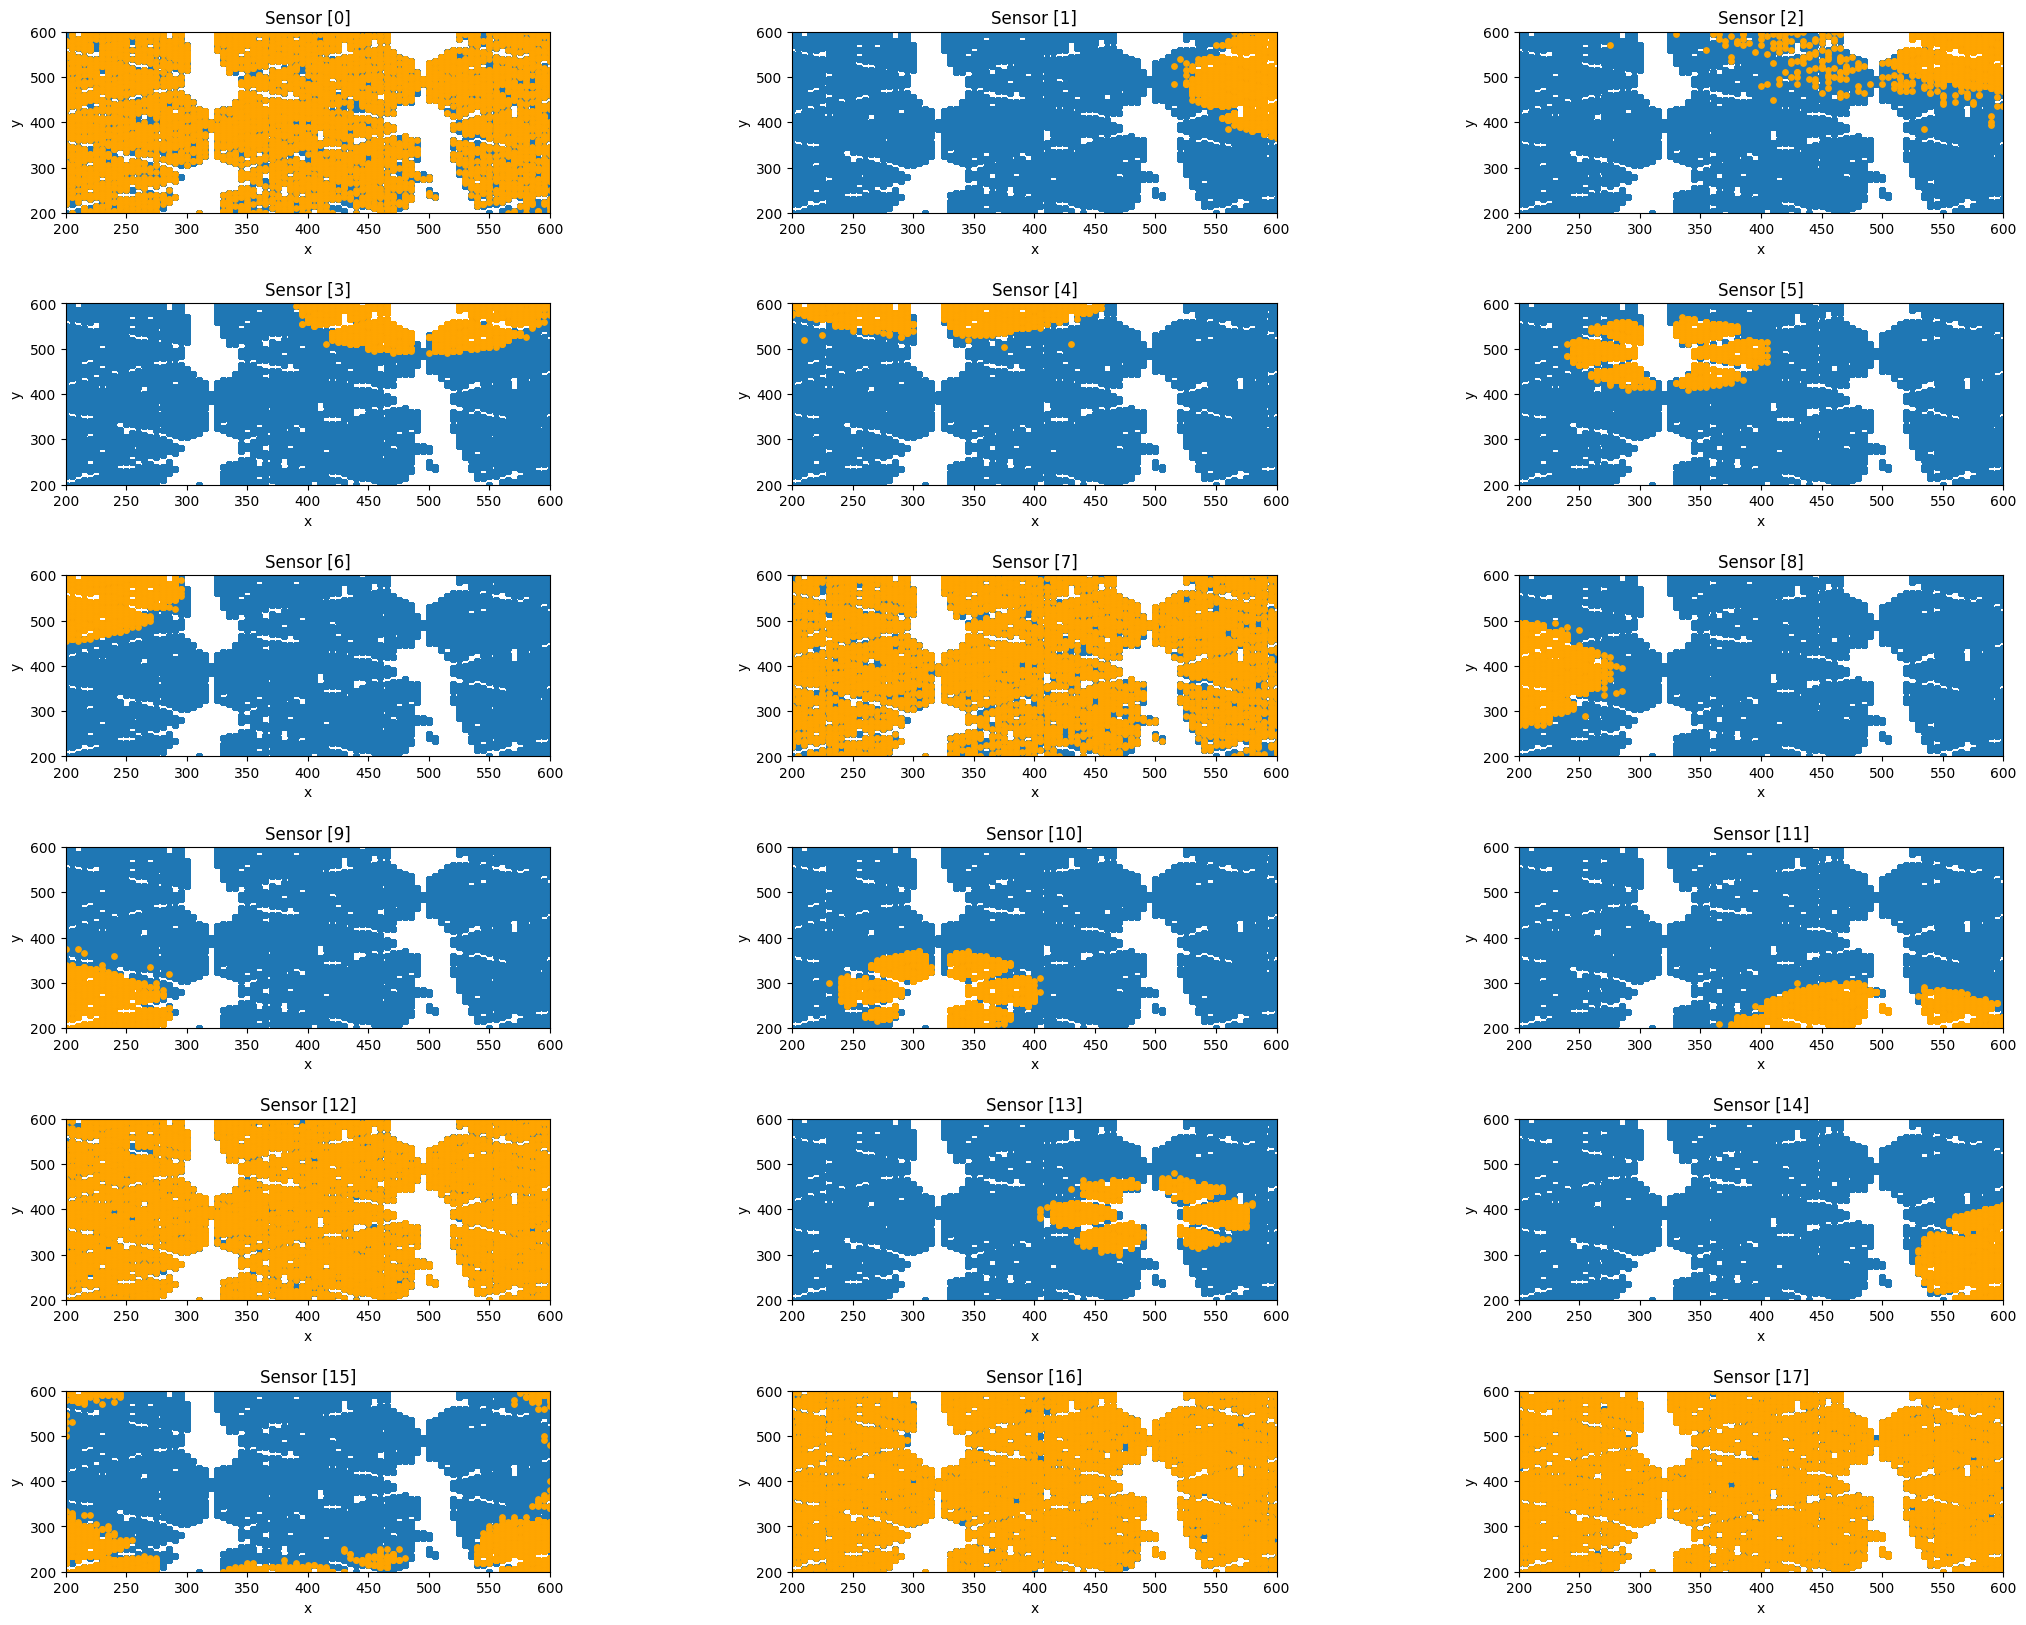

In [11]:
# EVENTS POSITION WRT THE PMAX MAGNITUDE
elem = 'pmax'
rows, cols = 6, 3
fig, ax = plt.subplots(rows, cols, figsize=(25, 20))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
i=0
for row in range(rows):
    for col in range(cols):
        limit =df_dev[f'{elem}[{i}]'].mean() + 2*df_dev[f'{elem}[{i}]'].std()
        mask =df_dev[f'{elem}[{i}]'] > limit
        ax[row, col].scatter(df_dev['x'],df_dev['y'], s=15, alpha=0.5)
        ax[row, col].scatter(df_dev[mask]['x'],df_dev[mask]['y'],c='orange', s=15)
        ax[row,col].set_title(f'Sensor [{i}]')
        ax[row,col].set_xlabel('x')
        ax[row,col].set_ylabel('y')
        ax[row, col].set_xlim(200, 600)
        ax[row, col].set_ylim(200, 600)
        i+=1
plt.show()

Grazie al grafico sopra si può intuire che il rumore è dato dalle features: 0,7,12,15,16 e 17. Per quanto riguarda la feature 15 non era facile comprendere se fosse o meno fonte di rumore, ma grazie a quest'ultimo grafico possiamo vedere che il presunto pad 15 è in grado di rilevare picchielevati su aree del sensore ben distanti, ciò implica che è fonte di rumore.

In [12]:
# REMOVE NOISE FEATURES

all_feature_index = np.arange(18)
list_noise = [0,7,12,15,16,17]
list_no_noise = [elem for elem in all_feature_index if elem not in list_noise]

for i in list_noise:
   df_dev = df_dev.drop(columns=[f'pmax[{i}]',f'negpmax[{i}]',f'area[{i}]',f'tmax[{i}]',f'rms[{i}]'])

feature_names =df_dev.drop(columns=['x','y']).columns

### OUTLIER DETECTION

In [13]:
df_dev[feature_names].describe()

pmax[1]     negpmax[1]        area[1]        tmax[1]  \
count  385500.000000  385500.000000  385500.000000  385500.000000   
mean       16.510543      -9.187917      10.504198      77.383326   
std        16.781018      29.955290       8.444105      30.102913   
min         2.028134   -9930.114637      -0.997301       0.000000   
25%         5.619728      -8.114323       4.755876      71.200000   
50%        10.068513      -5.229009       7.886552      71.800000   
75%        19.031319      -4.387686      12.945553      72.400000   
max       106.649066      -1.054508     152.517700     204.600000   

              rms[1]        pmax[2]     negpmax[2]        area[2]  \
count  385500.000000  385500.000000  385500.000000  385500.000000   
mean        1.335660       8.784017      -5.596777       6.288025   
std         0.340729       7.692692     173.289844       4.758113   
min         0.314711       1.799435  -10777.684263      -1.735430   
25%         1.092676       4.681271      -5.674350       3.116460   
50%         1.311898       5.714713      -4.873082       4.944174   
75%         1.552595       9.796498      -4.245788       7.888534   
max         5.860626      68.837366   74827.377234     136.872156   

             tmax[2]         rms[2]  ...       pmax[13]    negpmax[13]  \
count  385500.000000  385500.000000  ...  385500.000000  385500.000000   
mean       84.221963       1.356628  ...      41.233983     -22.280679   
std        43.514353       0.346268  ...      27.992784      35.573168   
min         0.000000       0.254500  ...       2.727048  -14186.920829   
25%        71.000000       1.109390  ...      17.327409     -33.413062   
50%        71.992175       1.333165  ...      33.571727     -16.318930   
75%        86.400000       1.577739  ...      60.328537      -7.224182   
max       204.600000       5.195023  ...     141.530914      -1.340251   

            area[13]       tmax[13]        rms[13]       pmax[14]  \
count  385500.000000  385500.000000  385500.000000  385500.000000   
mean       22.437697      71.709501       1.411607      16.656853   
std        13.082657       2.964976       0.358423      17.784631   
min         1.107431       0.000000       0.327664       1.801639   
25%        11.582386      71.200000       1.156713       5.720558   
50%        19.268355      71.600000       1.386532      10.125145   
75%        31.428853      72.200000       1.640055      18.720630   
max       120.175974     204.000000       6.283808     115.792004   

         negpmax[14]       area[14]       tmax[14]        rms[14]  
count  385500.000000  385500.000000  385500.000000  385500.000000  
mean       -9.865294       9.924054      77.455162       1.439037  
std       152.735946       8.719940      30.938912       0.366330  
min    -39039.394697      -1.937842       0.000000       0.318347  
25%        -8.207006       4.301519      70.800000       1.178395  
50%        -5.650892       7.185239      71.400000       1.414197  
75%        -4.799372      11.774312      72.200000       1.672101  
max     74812.277374      97.635488     204.600000       6.007198  

[8 rows x 60 columns]

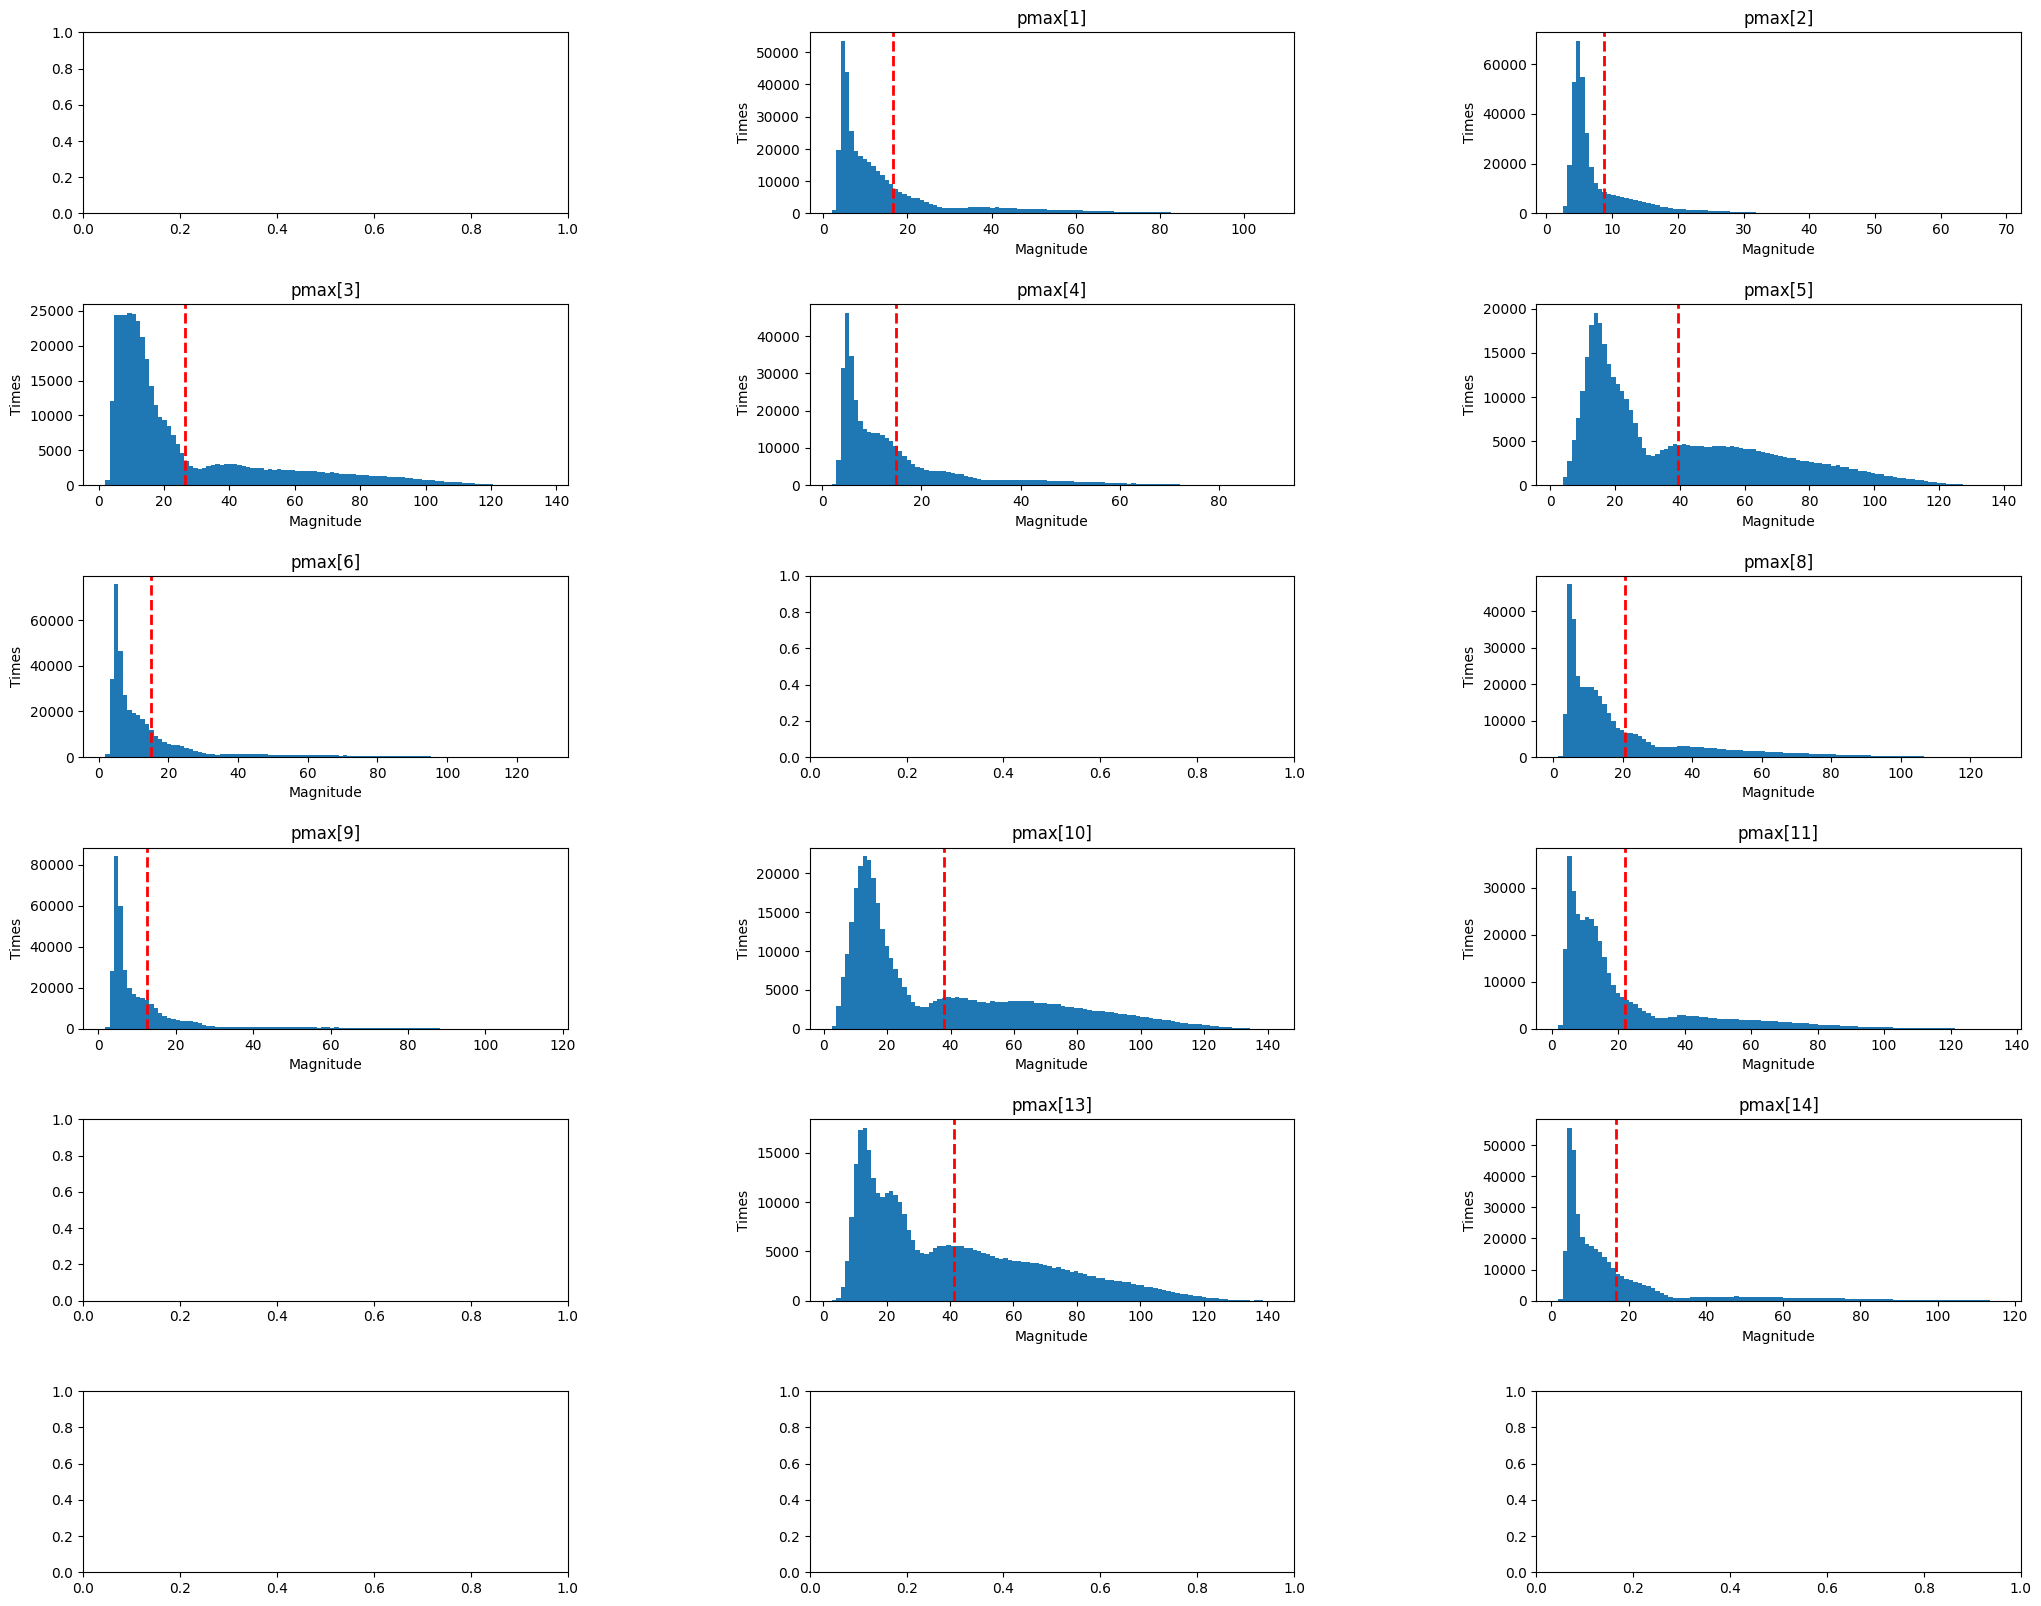

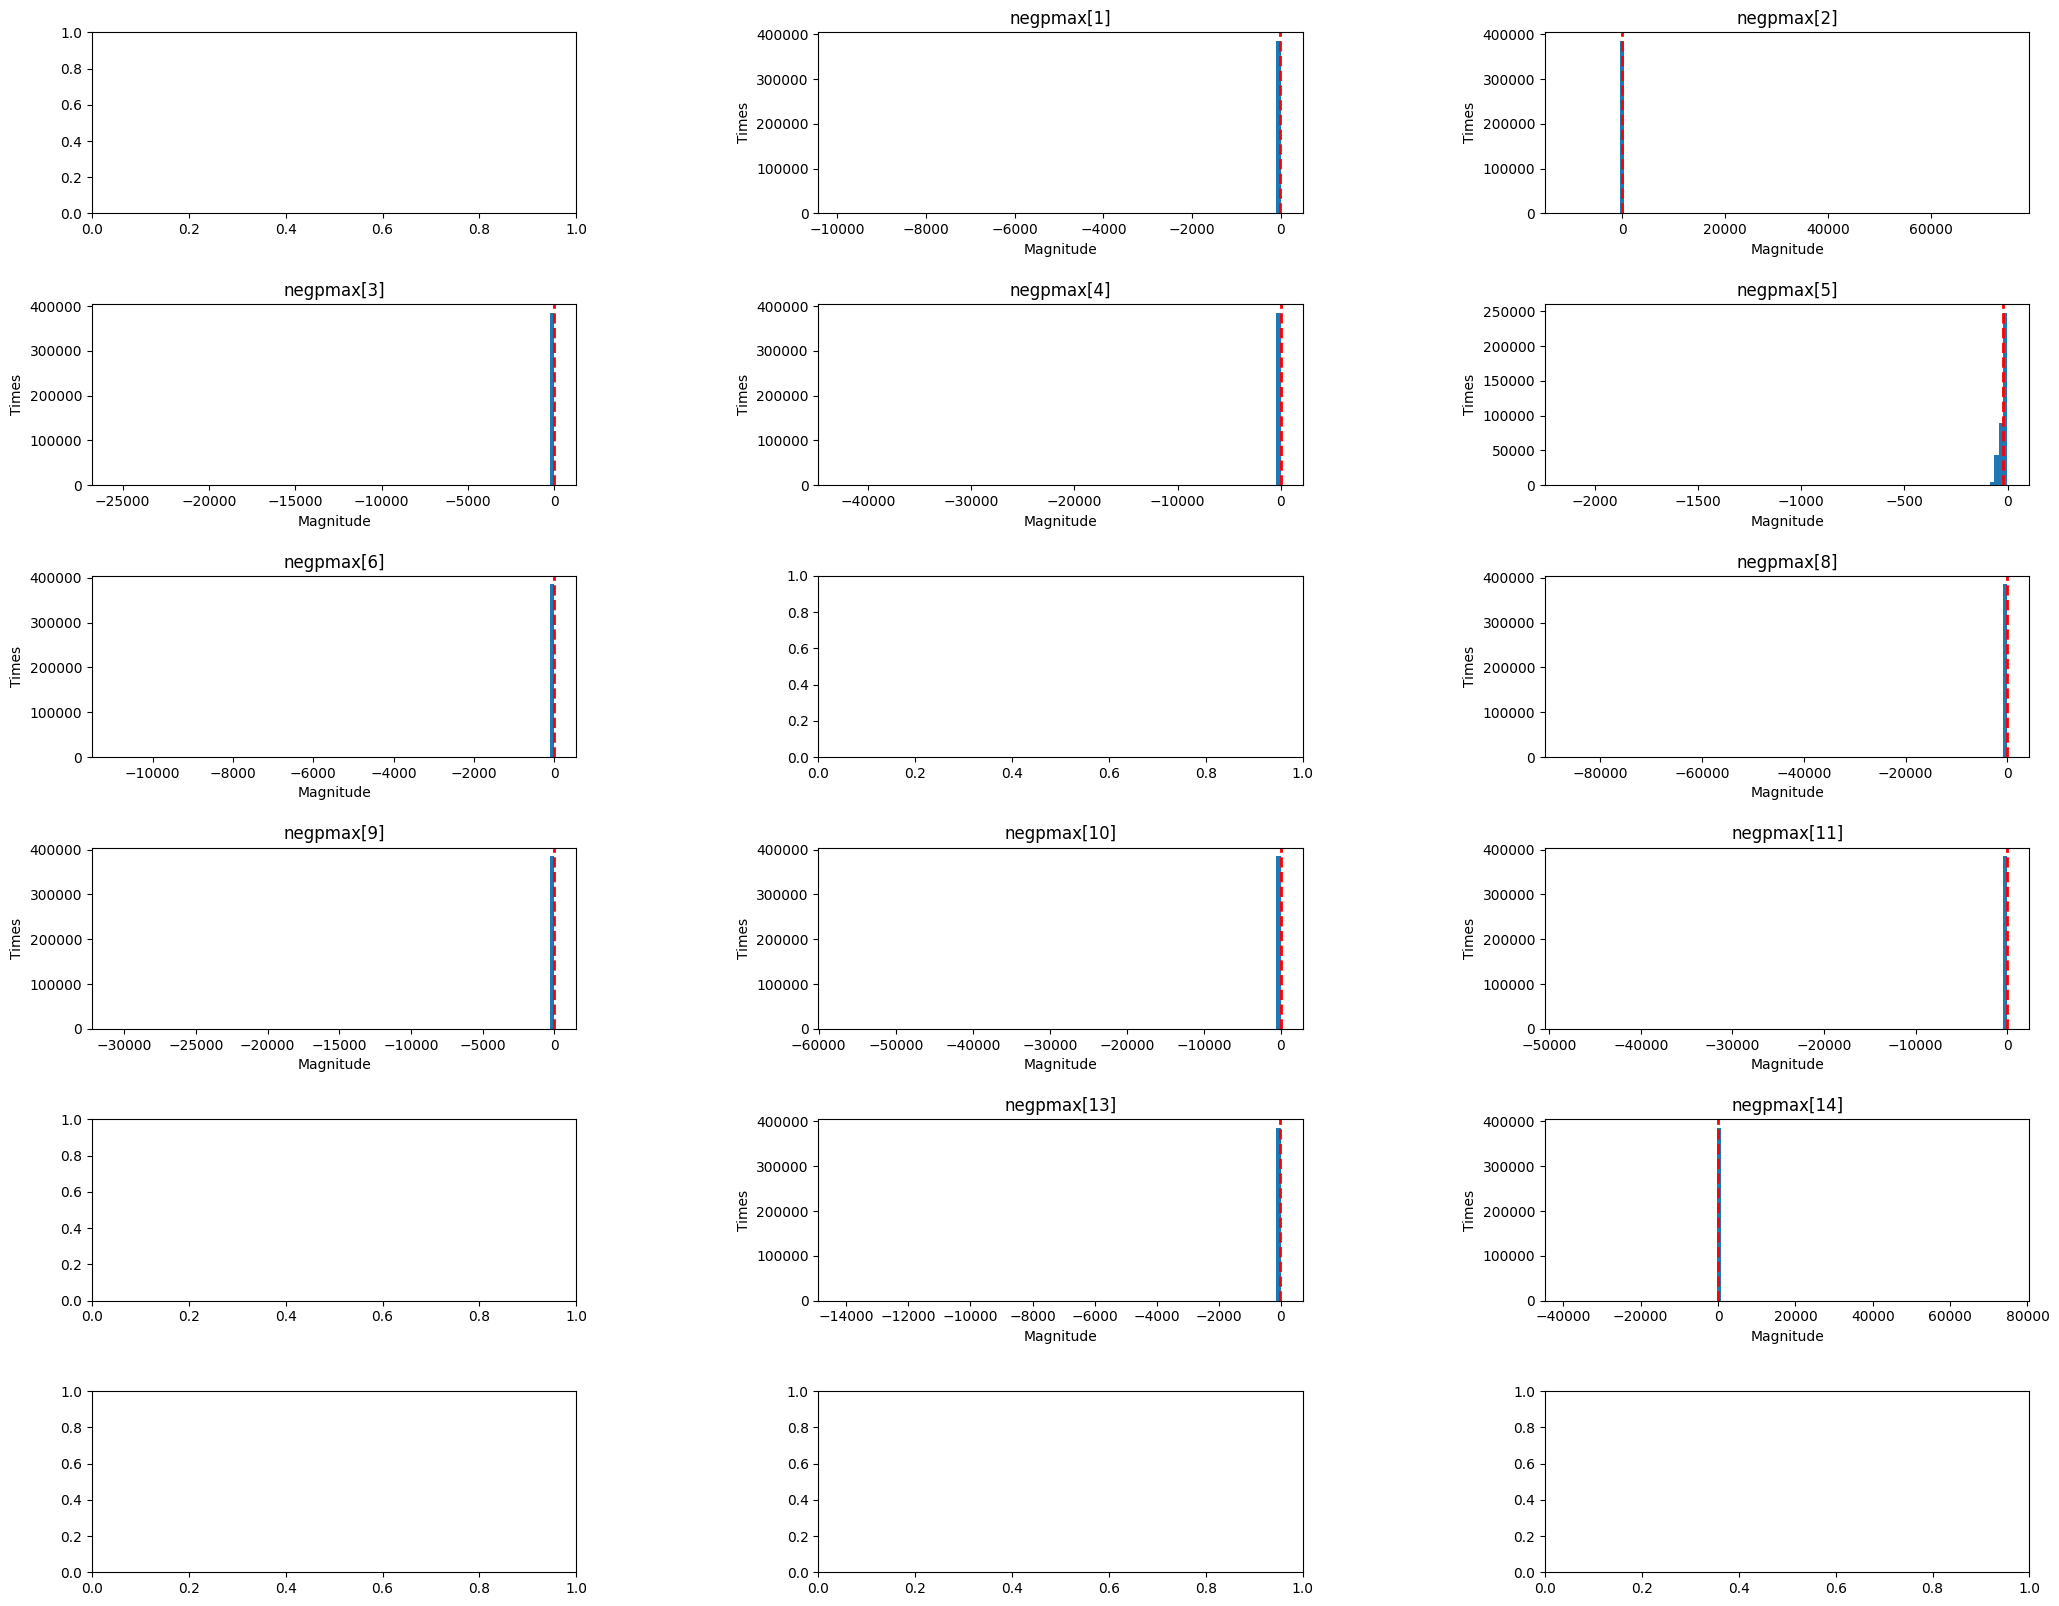

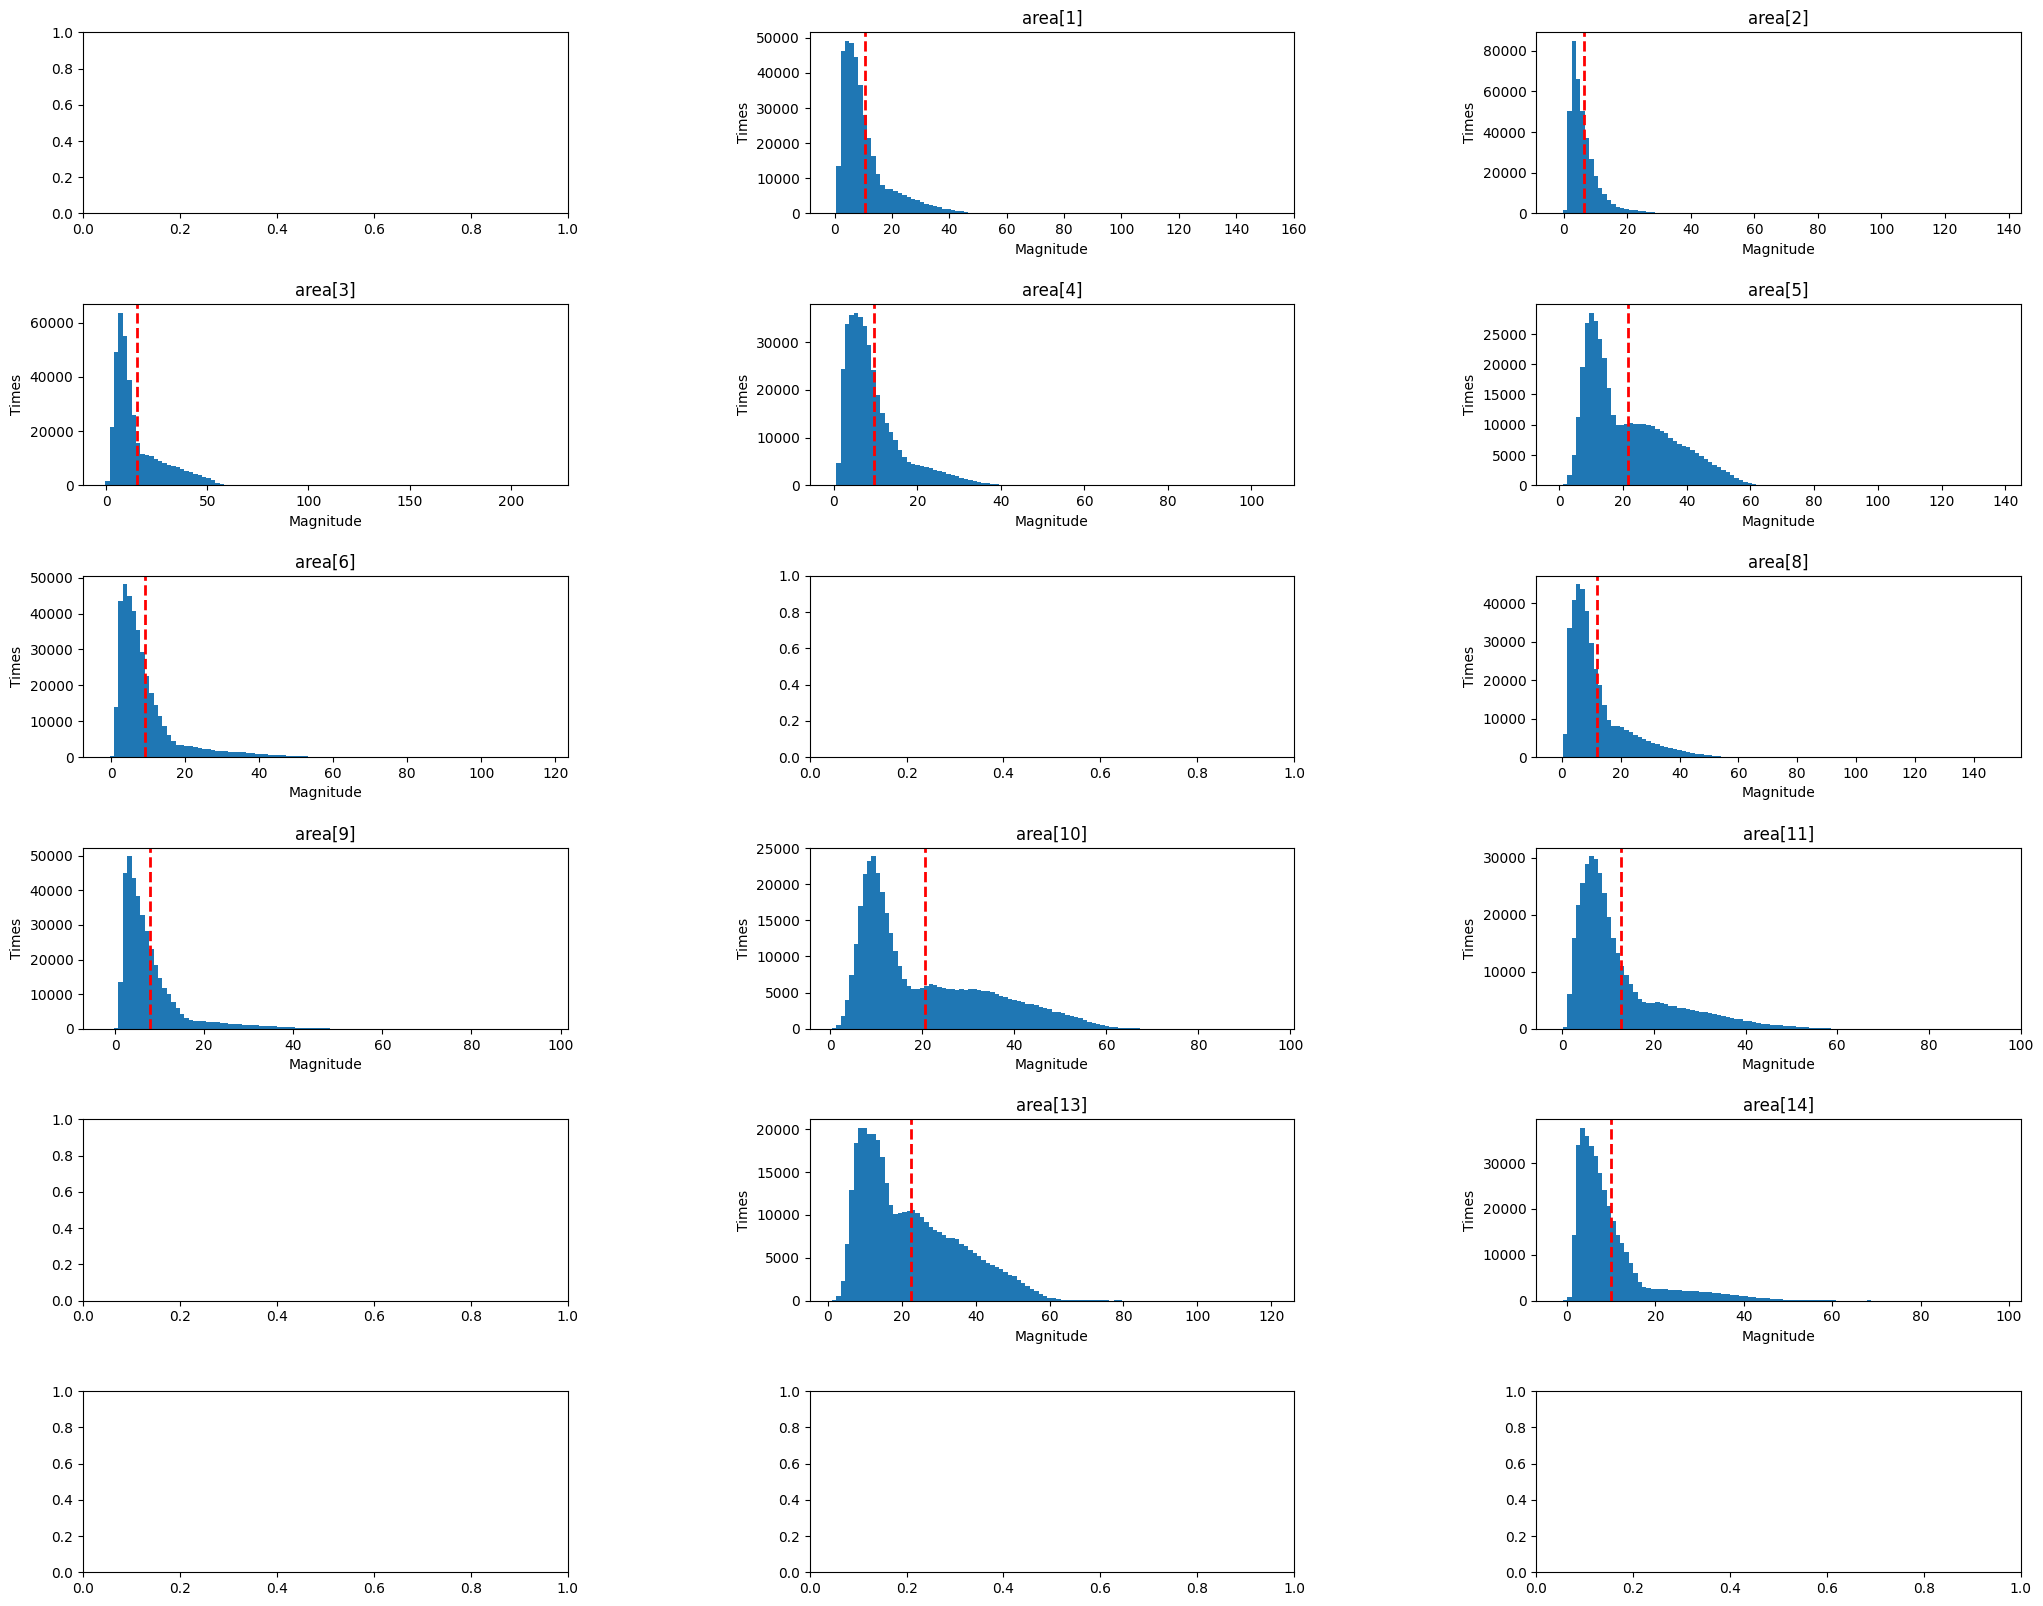

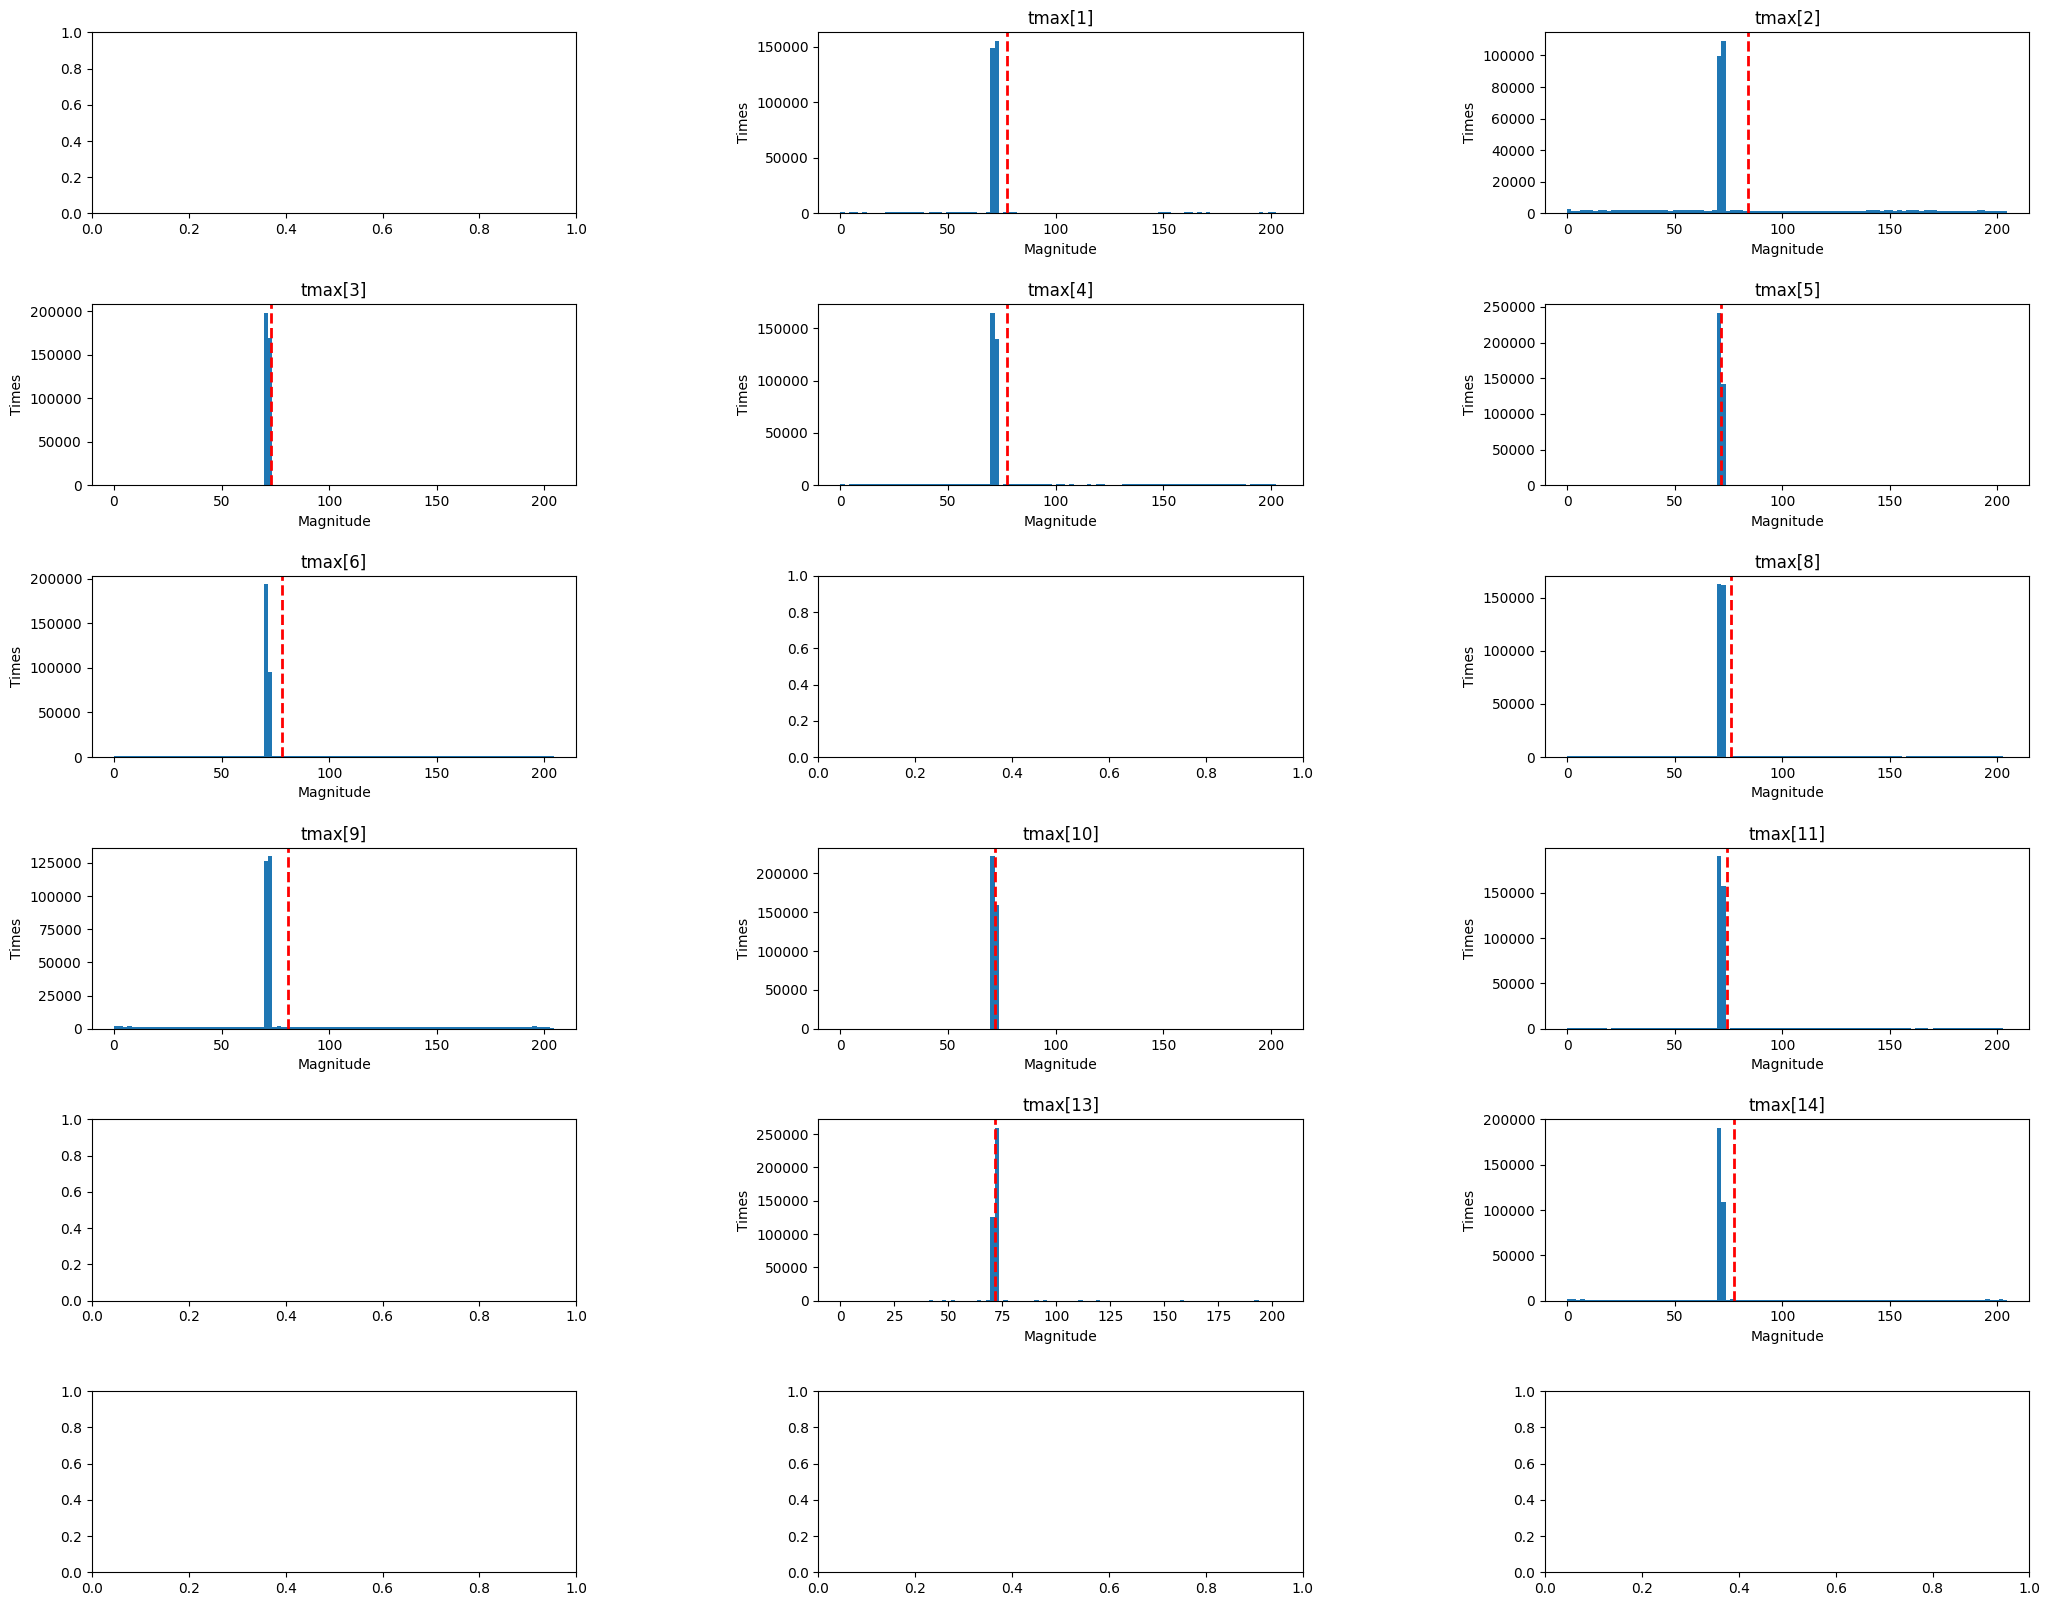

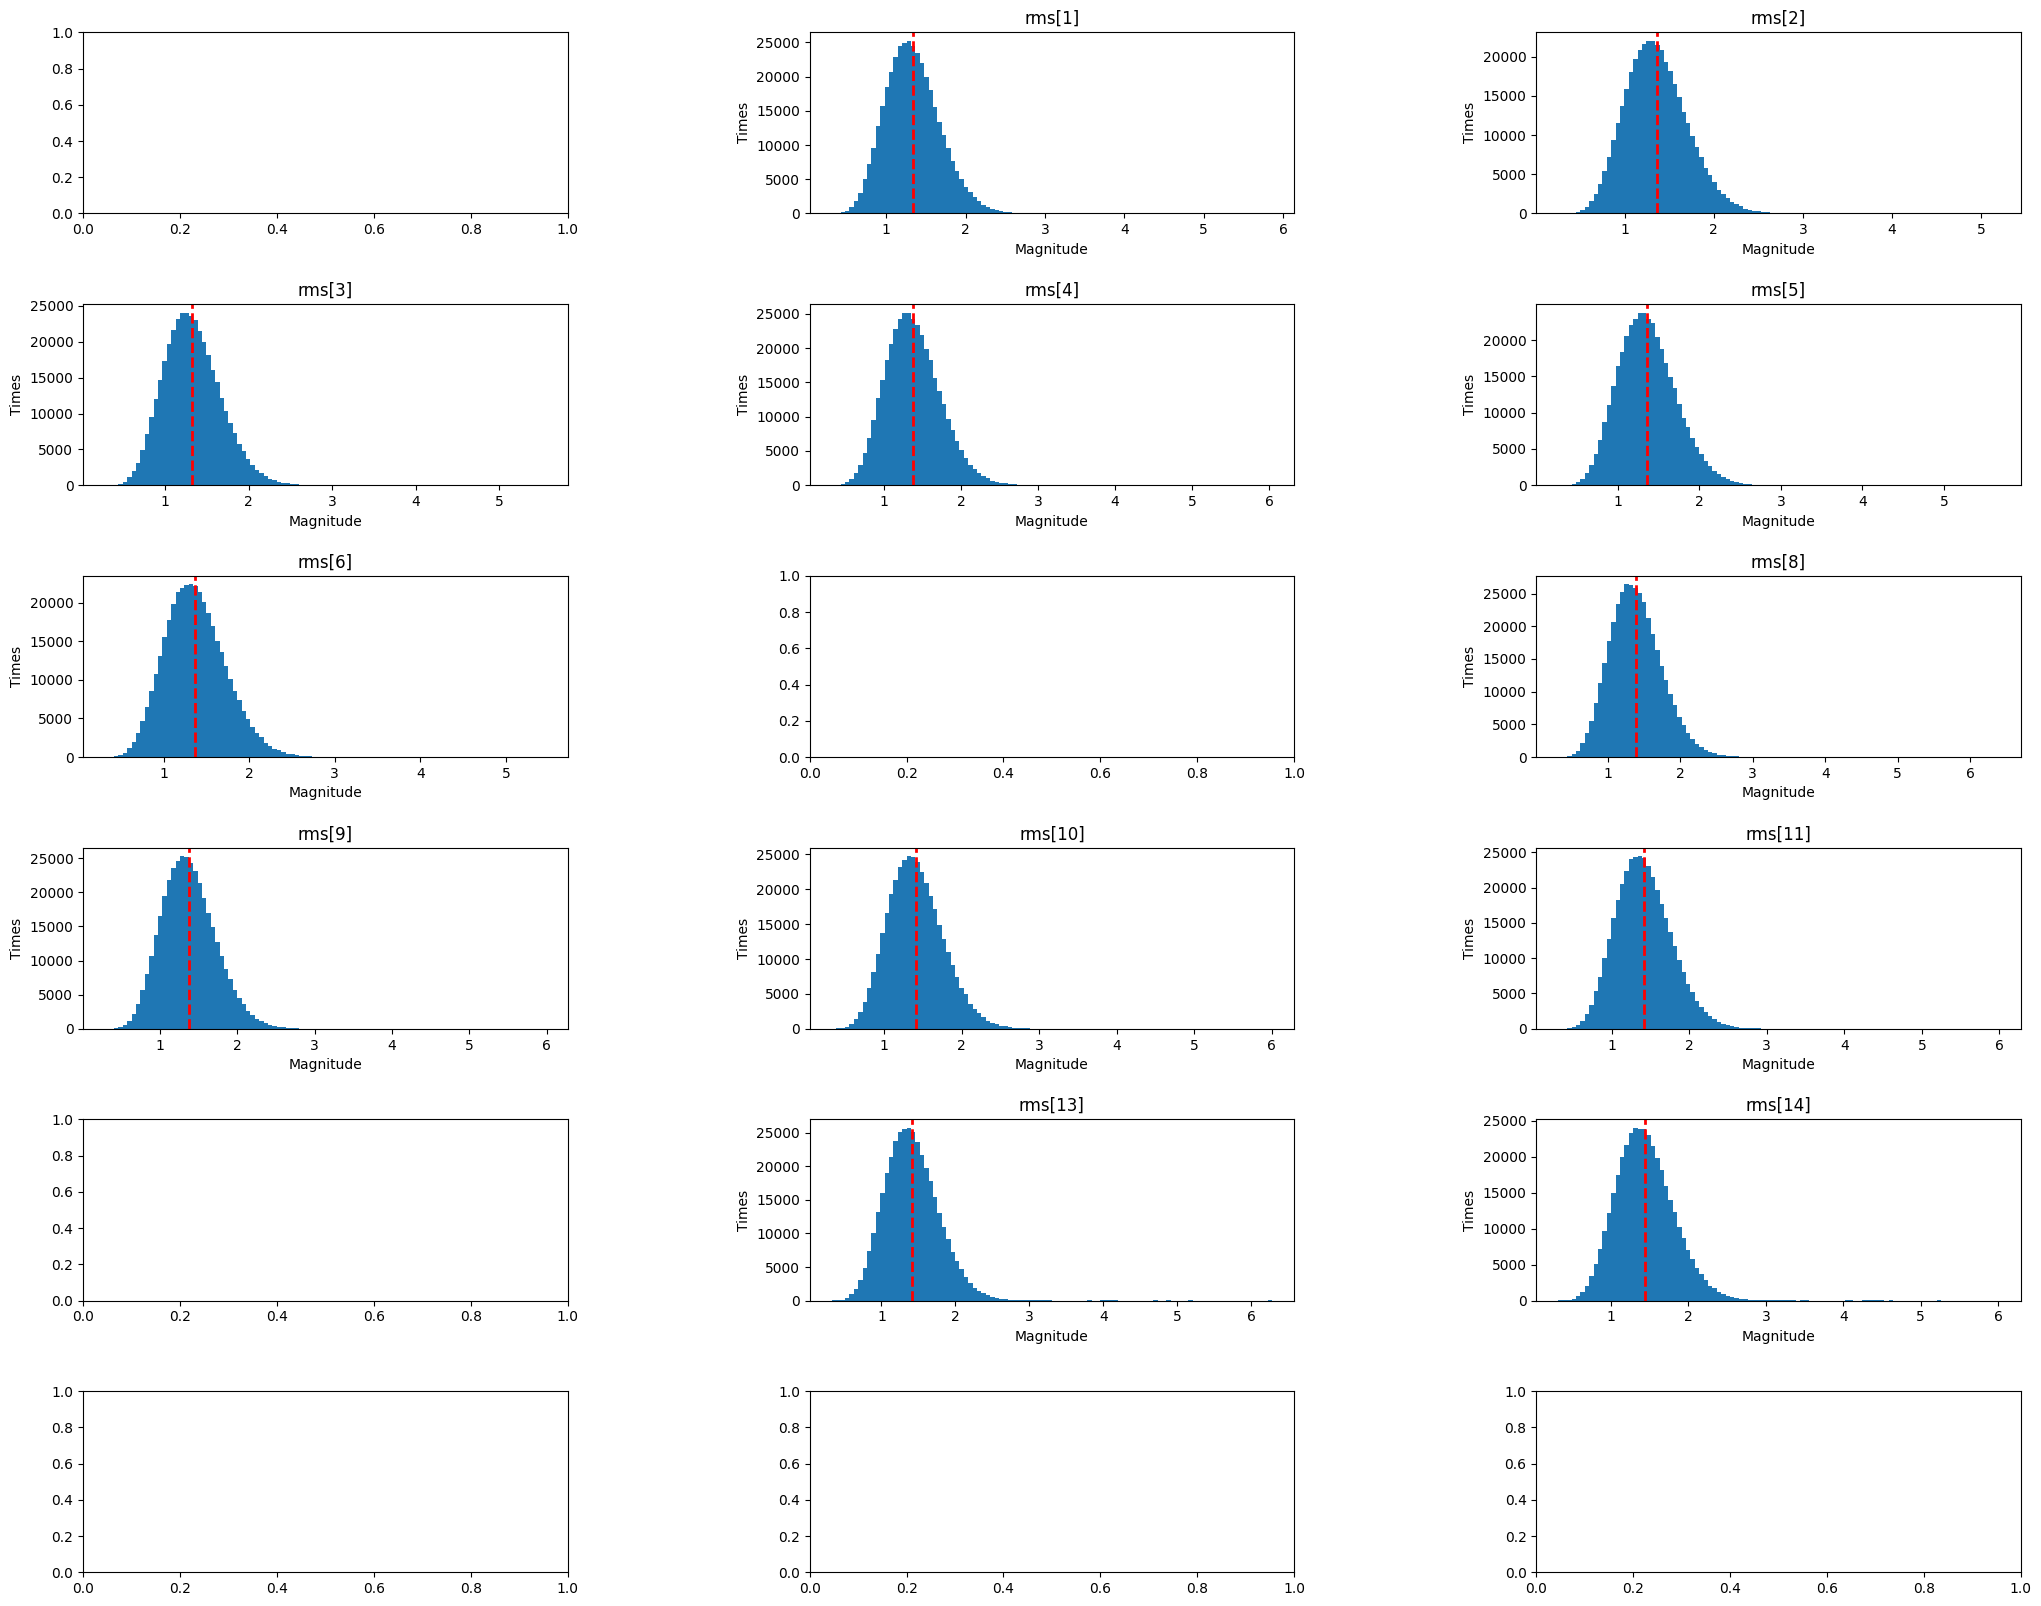

In [14]:
for elem in ['pmax','negpmax','area','tmax','rms']:
    rows, cols = 6, 3
    fig, ax = plt.subplots(rows, cols, figsize=(25, 20))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    i=0
    for row in range(rows):
        for col in range(cols):
            if i in list_no_noise:
                ax[row, col].hist(df_dev[f'{elem}[{i}]'],bins=100)
                ax[row, col].axvline(x=df_dev[f'{elem}[{i}]'].mean(), color='r', linestyle='dashed', linewidth=2)
                ax[row,col].set_title(f'{elem}[{i}]')
                ax[row,col].set_xlabel('Magnitude')
                ax[row,col].set_ylabel('Times')
            i+=1
    plt.show()
    print()

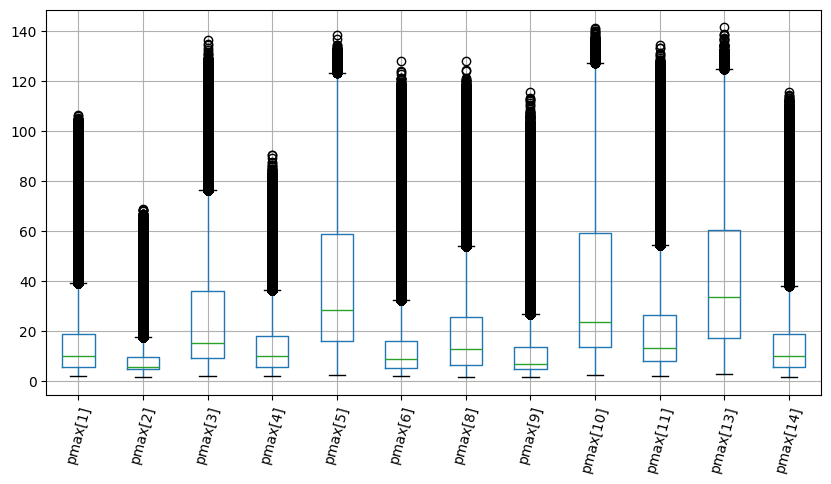

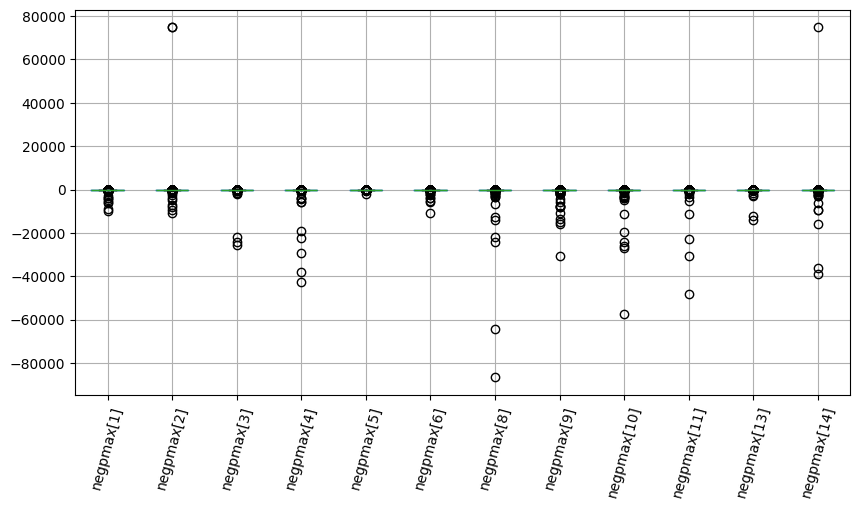

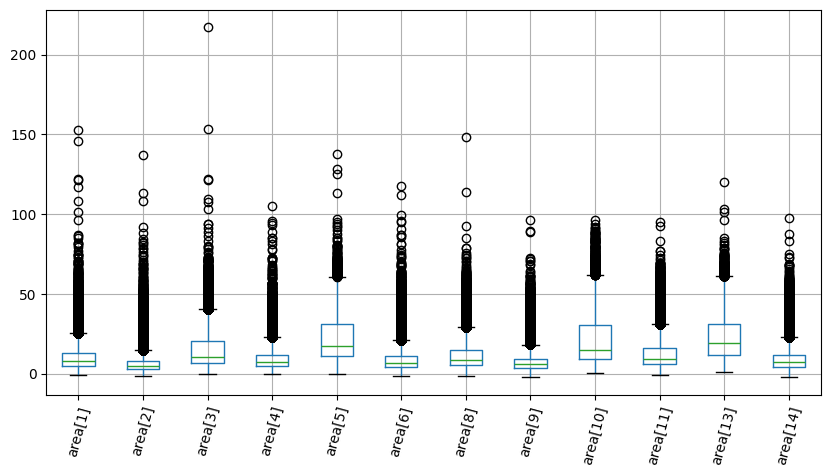

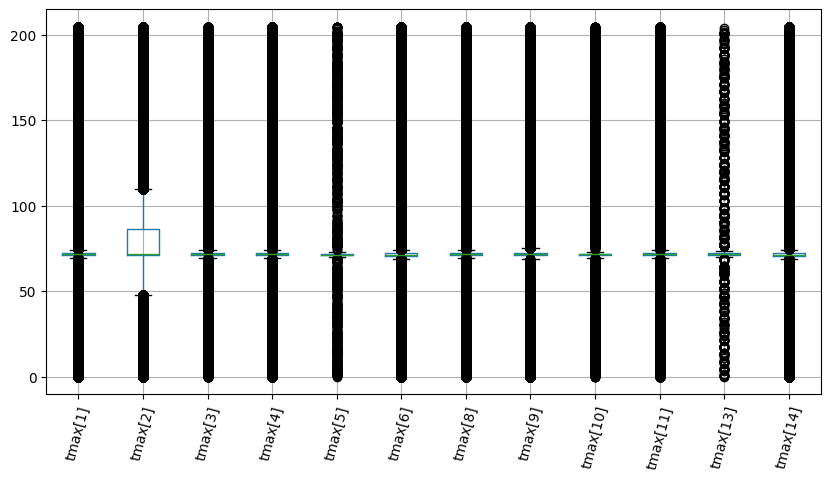

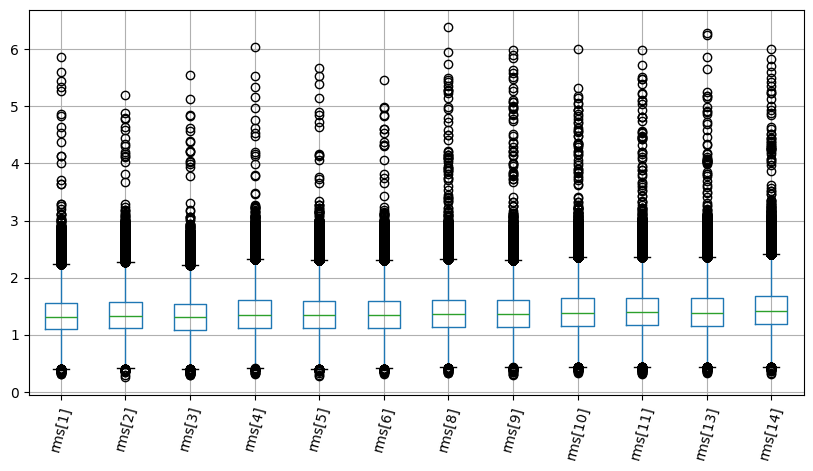

In [15]:
# BOXPLOTS
for elem in ['pmax','negpmax','area','tmax','rms']:
    df_dev[[f'{elem}[{i}]' for i in list_no_noise]].boxplot(figsize=(10,5), whis=1.5)
    plt.xticks(rotation=75)
    plt.show()

In [16]:
# REMOVE POSITIVE NEGPMAX VALUES
print('Number of lines before removing positive values from negpmax:', df_dev.shape[0])
for i in list_no_noise:
    df_dev = df_dev[df_dev[f'negpmax[{i}]'] < 0]
print('Number of lines after removing positive values from negpmax:', df_dev.shape[0])

Number of lines before removing positive values from negpmax: 385500
Number of lines after removing positive values from negpmax: 385497


In [17]:
df_no_outliers = pd.DataFrame(df_dev)

for elem in ['pmax','negpmax','area','tmax','rms']:
    for i in list_no_noise:
        values = df_dev[[f'{elem}[{i}]']]
        df_no_outliers['zscore'] = (values - values.mean()) / values.std()
        df_no_outliers = df_no_outliers[(df_no_outliers['zscore']>-5) & (df_no_outliers['zscore']<5)]
        
df_no_outliers = df_no_outliers.drop(columns=['zscore'])

In [18]:
df_no_outliers.shape

(364522, 62)

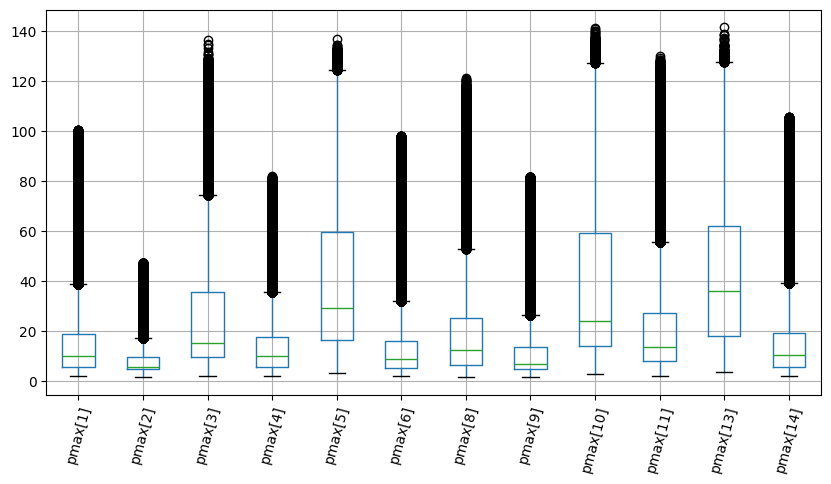

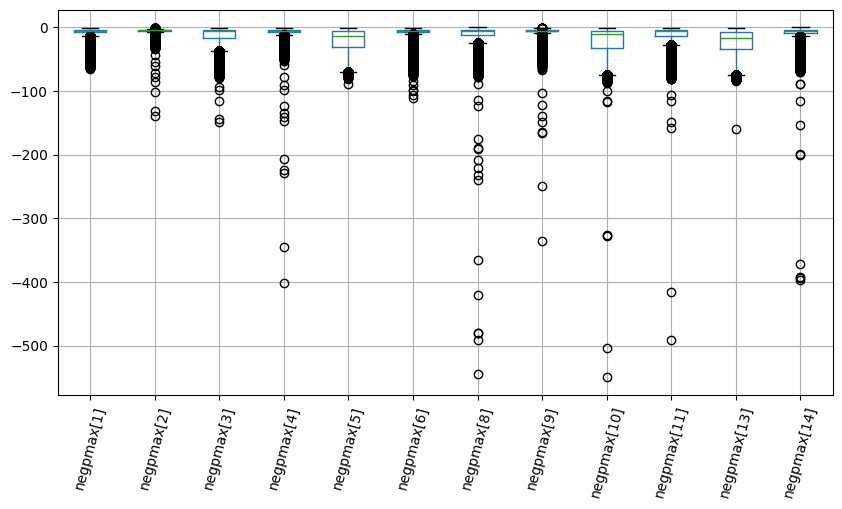

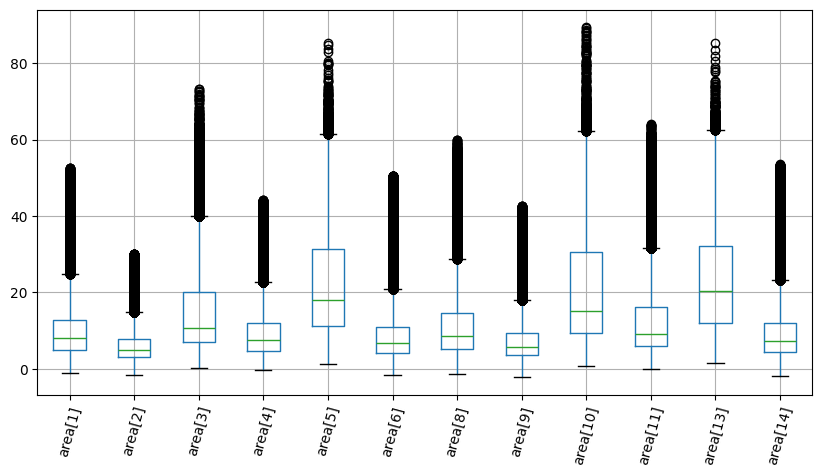

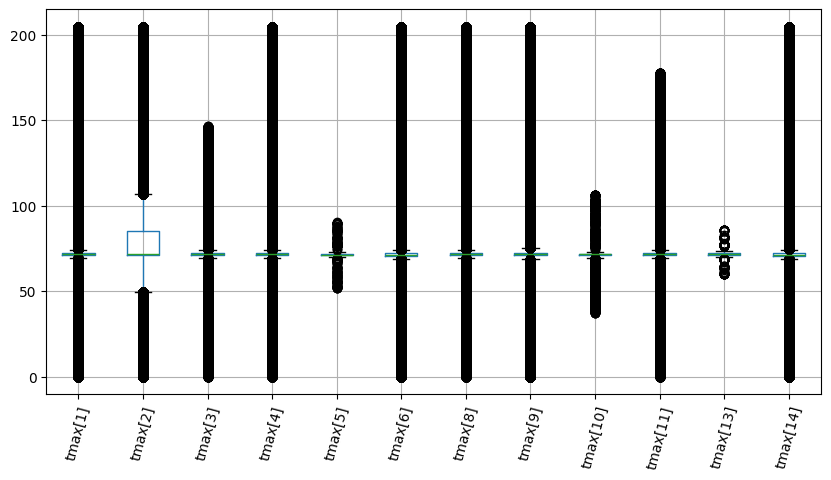

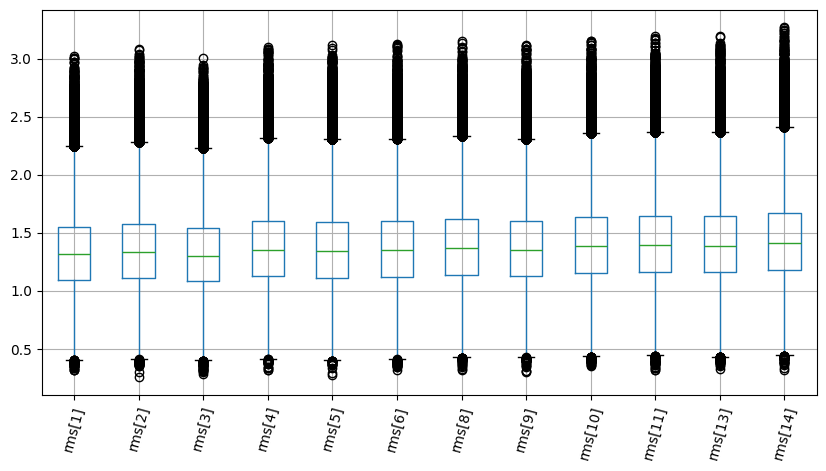

In [19]:
# BOXPLOTS
for elem in ['pmax','negpmax','area','tmax','rms']:
    df_no_outliers[[f'{elem}[{i}]' for i in list_no_noise]].boxplot(figsize=(10,5), whis=1.5)
    plt.xticks(rotation=75)
    plt.show()

### FEATURES SELECTION

In [20]:
# FEATURES SELECTION
X = df_no_outliers.drop(columns=['x', 'y']).values
y = df_no_outliers[['x', 'y']].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size= 0.2, shuffle=True, random_state=random_state)

In [21]:
reg = RandomForestRegressor(n_estimators=100, random_state=random_state, n_jobs=-1)

In [22]:
#start
start_time = time.time()

reg.fit(X_train , y_train)

#end
end_time = time.time()
print(f"Execution Time: {end_time - start_time} seconds")

Execution Time: 254.33802795410156 seconds


In [23]:
print('R^2 score:',r2_score(y_valid, reg.predict(X_valid)))

R^2 score: 0.998741422927967


In [24]:
# feature importances
sorted(zip(feature_names, reg.feature_importances_), key = lambda x: x[1], reverse = True)

[('pmax[8]', 0.35618636784096647),
 ('pmax[11]', 0.24262289375428436),
 ('pmax[10]', 0.15008986067838592),
 ('pmax[5]', 0.07400232334685797),
 ('pmax[13]', 0.040212181487377804),
 ('pmax[9]', 0.0330987064002466),
 ('negpmax[13]', 0.018986374955352447),
 ('negpmax[3]', 0.016702083192303922),
 ('negpmax[11]', 0.013179283849510011),
 ('pmax[4]', 0.012398804036978465),
 ('negpmax[10]', 0.008962288478648408),
 ('negpmax[8]', 0.005397401333232282),
 ('pmax[3]', 0.005057814119622519),
 ('negpmax[1]', 0.004378048326791143),
 ('negpmax[5]', 0.004173799801878697),
 ('negpmax[6]', 0.003173286935286668),
 ('pmax[1]', 0.0026419344667165034),
 ('negpmax[14]', 0.0021282094137162768),
 ('negpmax[4]', 0.002066359365767687),
 ('negpmax[9]', 0.0011306914373889914),
 ('pmax[6]', 0.000966490580397785),
 ('pmax[14]', 0.0008298748925506674),
 ('pmax[2]', 0.00045525110105792504),
 ('area[5]', 0.00013408095962934264),
 ('area[13]', 0.00011626911539567299),
 ('area[11]', 0.00010050194100315953),
 ('negpmax[2]',

In [25]:
df_no_outliers.shape

(364522, 62)

In [27]:
for i in list_no_noise:
    df_no_outliers = df_no_outliers.drop(columns=[f'tmax[{i}]',f'rms[{i}]',f'area[{i}]'])
df_clean = df_no_outliers

In [28]:
df_clean.shape

(364522, 26)

# MODEL IMPLEMENTATION

### TRAIN TEST SPLIT

In [29]:
# TRAIN TEST SPLIT
X = df_clean.drop(columns=['x', 'y']).values
y = df_clean[['x', 'y']].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size= 0.2, shuffle=True, random_state=random_state)

### RANDOM FOREST REGRESSION MODEL

In [30]:
reg = RandomForestRegressor(n_estimators=100, random_state=random_state, n_jobs=-1)

In [31]:
#start
start_time = time.time()

reg.fit(X_train , y_train)

#end
end_time = time.time()
print(f"Execution Time: {end_time - start_time} seconds")

Execution Time: 145.02508902549744 seconds


In [32]:
y_pred = reg.predict(X_valid)

### LINEAR REGRESSION MODEL (distance = 16.07)

In [33]:
lreg = LinearRegression(n_jobs=-1)

In [34]:
#start
start_time = time.time()

#lreg.fit(X_train , y_train)

#end
end_time = time.time()
print(f"Execution Time: {end_time - start_time} seconds")

Execution Time: 1.0967254638671875e-05 seconds


In [35]:
y_pred = lreg.predict(X_valid)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### POLYNOMIAL REGRESSION MODEL (distance = 573.16)

In [ ]:
preg = PolynomialFeatures(degree=3, include_bias=False)

In [ ]:
#start
start_time = time.time()

#preg.fit(X_train , y_train)

#end
end_time = time.time()
print(f"Execution Time: {end_time - start_time} seconds")

In [ ]:
y_pred = preg.transform(X_valid)

### KNEIGHBORS REGRESSION MODEL

In [ ]:
knreg = KNeighborsRegressor()

In [ ]:
#start
start_time = time.time()

#lreg.fit(X_train , y_train)

#end
end_time = time.time()
print(f"Execution Time: {end_time - start_time} seconds")

In [ ]:
y_pred = lreg.predict(X_valid)

### LinearSVR

In [ ]:
"""
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
"""
pass

In [ ]:
#start
start_time = time.time()

#wrapper.fit(X_train , y_train)

#end
end_time = time.time()
print(f"Execution Time: {end_time - start_time} seconds")

In [ ]:
y_pred = reg.predict(X_valid)

# EVALUATION

In [36]:
# EVALUATION
def distance_evaluation(xy_predict, xy_test):
    # number of samples
    n = xy_predict.shape[0]
    sum = 0

    # calculate the sum
    for i in range(n):
        sum += ((xy_test[i][0] - xy_predict[i][0])**2 + (xy_test[i][1] - xy_predict[i][1])**2)**0.5
    # return the distance
    return sum/n

result = distance_evaluation(y_pred, y_valid)
print('Distance Evaluation Result:', result)

Distance Evaluation Result: 4.461918563641581


In [43]:
# FIX EVALUATION DATASET
for i in list_noise:
   df_eval = df_eval.drop(columns=[f'pmax[{i}]',f'negpmax[{i}]',f'area[{i}]',f'tmax[{i}]',f'rms[{i}]'])
    
for i in list_no_noise:
    df_eval = df_eval.drop(columns=[f'tmax[{i}]',f'rms[{i}]', f'area[{i}]'])

In [44]:
X_eval = df_eval.values

In [45]:
y_pred = reg.predict(X_eval)

# FORMAT

In [46]:
df_pred = pd.DataFrame(y_pred, columns=['Predicted1','Predicted2'])

df_pred['Id'] = df_pred.index

df_pred['Predicted'] = df_pred[['Predicted1', 'Predicted2']].astype(str).agg('|'.join, axis=1)

df_pred = df_pred.drop(columns=['Predicted1', 'Predicted2'])

df_pred.to_csv('pred.csv', index=False)